In [1]:
include("dsnb_funcs.jl")
using Optim
using Serialization;

In [6]:
convfactor = 3.086e19 * 5.06773093741 * 1e6

1e15 / (convfactor * 8)

7.992829384484116e-13

In [2]:
α_to_τoverm(8e-13)

0.0008245382585751979

In [3]:
function create_flux_dict_NOQD_B()
    dsnb_fluxes_NOQD_B = Dict{Tuple{String, Bool, Float64, Float64},Vector{Float64}}()
    for i in 1:1323
        filepath = "Data/dsnb_NOQD_raw_data/outputs_B/array_output_46144269_$i.txt"
        file_content = read(filepath, String)
        if file_content == ""
            dsnb_fluxes_NOQD_B[("error", true, 0.0, 0.0)] = zeros(100)
            dsnb_fluxes_NOQD_B[("error", false, 0.0, 0.0)] = zeros(100)
        else
            parsed_data = Meta.parse(file_content)
            prog = parsed_data.args[2].args[1]
            logα1 = log10(parsed_data.args[2].args[2])
            logα2 = log10(parsed_data.args[2].args[3])
            dsnb_nubar = [parsed_data.args[3].args[1].args[i] for i in 1:100]
            dsnb_nu = [parsed_data.args[3].args[2].args[i] for i in 1:100]

            dsnb_fluxes_NOQD_B[(prog, true, logα1, logα2)] = dsnb_nubar
            dsnb_fluxes_NOQD_B[(prog, false, logα1, logα2)] = dsnb_nu
        end
    end
    return dsnb_fluxes_NOQD_B
end;

function create_flux_dict_NOQD_C()
    dsnb_fluxes_NOQD_C = Dict{Tuple{String, Bool, Float64, Float64},Vector{Float64}}()
    for i in 1:1323
        filepath = "Data/dsnb_NOQD_raw_data/outputs_C/array_output_46150484_$i.txt"
        file_content = read(filepath, String)
        if file_content == ""
            dsnb_fluxes_NOQD_C[("error", true, 0.0, 0.0)] = zeros(100)
            dsnb_fluxes_NOQD_C[("error", false, 0.0, 0.0)] = zeros(100)
        else
            parsed_data = Meta.parse(file_content)
            prog = parsed_data.args[2].args[1]
            logα1 = log10(parsed_data.args[2].args[2])
            logα2 = log10(parsed_data.args[2].args[3])
            dsnb_nubar = [parsed_data.args[3].args[1].args[i] for i in 1:100]
            dsnb_nu = [parsed_data.args[3].args[2].args[i] for i in 1:100]

            dsnb_fluxes_NOQD_C[(prog, true, logα1, logα2)] = dsnb_nubar
            dsnb_fluxes_NOQD_C[(prog, false, logα1, logα2)] = dsnb_nu
        end
    end
    return dsnb_fluxes_NOQD_C
end

function create_flux_dict_NOSH_B()
    dsnb_fluxes_NOSH_B = Dict{Tuple{String, Bool, Float64, Float64},Vector{Float64}}()
    for i in 1:1323
        filepath = "Data/dsnb_NOSH_raw_data/outputs_B/array_output_45827623_$i.txt"
        file_content = read(filepath, String)
        if file_content == ""
            dsnb_fluxes_NOSH_B[("error", true, 0.0, 0.0)] = zeros(100)
            dsnb_fluxes_NOSH_B[("error", false, 0.0, 0.0)] = zeros(100)
        else
            parsed_data = Meta.parse(file_content)
            prog = parsed_data.args[2].args[1]
            logα1 = log10(parsed_data.args[2].args[2])
            logα2 = log10(parsed_data.args[2].args[3])
            dsnb_nubar = [parsed_data.args[3].args[1].args[i] for i in 1:100]
            dsnb_nu = [parsed_data.args[3].args[2].args[i] for i in 1:100]

            dsnb_fluxes_NOSH_B[(prog, true, logα1, logα2)] = dsnb_nubar
            dsnb_fluxes_NOSH_B[(prog, false, logα1, logα2)] = dsnb_nu
        end
    end
    return dsnb_fluxes_NOSH_B
end

function create_flux_dict_NOSH_C()
    dsnb_fluxes_NOSH_C = Dict{Tuple{String, Bool, Float64, Float64},Vector{Float64}}()
    for i in 1:12
        filepath = "Data/dsnb_NOSH_raw_data/outputs_C/array_output_46165275_$i.txt"
        file_content = read(filepath, String)
        if file_content == ""
            dsnb_fluxes_NOSH_C[("error", true, 0.0, 0.0)] = zeros(100)
            dsnb_fluxes_NOSH_C[("error", false, 0.0, 0.0)] = zeros(100)
        else
            parsed_data = Meta.parse(file_content)
            prog = parsed_data.args[2].args[1]
            logα1 = log10(parsed_data.args[2].args[2])
            logα2 = log10(parsed_data.args[2].args[3])
            dsnb_nubar = [parsed_data.args[3].args[1].args[i] for i in 1:100]
            dsnb_nu = [parsed_data.args[3].args[2].args[i] for i in 1:100]

            dsnb_fluxes_NOSH_C[(prog, true, logα1, logα2)] = dsnb_nubar
            dsnb_fluxes_NOSH_C[(prog, false, logα1, logα2)] = dsnb_nu
        end
    end
    return dsnb_fluxes_NOSH_C
end

create_flux_dict_NOSH_C (generic function with 1 method)

In [4]:
flux_dict_NO_C = create_flux_dict_NOSH_C();

open("Data/model_matrix/dsnb_fluxes_NO_C_dict.dat", "w") do io
    serialize(io, flux_dict_NO_C)
end

In [91]:
flux_dict_NOQD_B = create_flux_dict_NOQD_B();

open("Data/model_matrix/dsnb_fluxes_NOQD_B_dict.dat", "w") do io
    serialize(io, flux_dict_NOQD_B)
end

flux_dict_NO_B = create_flux_dict_NOSH_B();

open("Data/model_matrix/dsnb_fluxes_NO_B_dict.dat", "w") do io
    serialize(io, flux_dict_NO_B)
end

flux_dict_NOQD_C = create_flux_dict_NOQD_C();

open("Data/model_matrix/dsnb_fluxes_NOQD_C_dict.dat", "w") do io
    serialize(io, flux_dict_NOQD_C)
end

In [12]:
dsnb_3nu_NOSH_B_24_24_bh = [5.153141509339693, 4.078676205490334, 3.4434373960312974, 3.0211664134107594, 2.714647157314984, 2.474564178366811, 2.2747072836019955, 2.1008585228189935, 1.9451654651171206, 1.8031865464600234, 1.6723280857940663, 1.5510062407373577, 1.4381924649788977, 1.3331639210022963, 1.2353672741570716, 1.1443416504041013, 1.0596801421502064, 0.9810048392759146, 0.9079575249176539, 0.8401933576256367, 0.7773795751569818, 0.7191961144350302, 0.6653350172026615, 0.6155017070941714, 0.5694156446185142, 0.5268108701088953, 0.4874360648433193, 0.45105489467135973, 0.4174453374771453, 0.3864001983634456, 0.35772552181191497, 0.3312412999177627, 0.3067801862172376, 0.28418634865407244, 0.2633157710416136, 0.24403561118148892, 0.22622219121252035, 0.20976174548678334, 0.19454840228149017, 0.18048619719310702, 0.16748539297872633, 0.15546306010759706, 0.14434320934715222, 0.13405517475236525, 0.1245362792326597, 0.11572508261257382, 0.10756892637127713, 0.10001462738772131, 0.09301886682928785, 0.08653507451684013, 0.08052841294044258, 0.07495987348769127, 0.06979390467100864, 0.06500475223807183, 0.06061481287567502, 0.056480020726428534, 0.052646951258590695, 0.0490876398772666, 0.04578184853781653, 0.04271042169470982, 0.03985587612300708, 0.03720205037122511, 0.034728772651825376, 0.03243439310985741, 0.030299471043695722, 0.02831269889775307, 0.026463217653601746, 0.024740764490683086, 0.02313611179346703, 0.021641059714908314, 0.020247612920529425, 0.01894068035196531, 0.017730698121183483, 0.01660159962206734, 0.015548271413992253, 0.014565092868883852, 0.01364724529058785, 0.012790188793070766, 0.011989657978712308, 0.011241709128406144, 0.01054275079661474, 0.009889593197750676, 0.009278723045173203, 0.008696018148591613, 0.00816299241770447, 0.007664268906816457, 0.007197246082691648, 0.006760190980898468, 0.006350957503840269, 0.005967579443424625, 0.005608475812137615, 0.005271874077889582, 0.004956549813686262, 0.004660638574256031, 0.004383472200688645, 0.0041234262424232, 0.003879565267284911, 0.0036506832801273853, 0.0034359611823460475, 0.0032344178033731547] #, [4.63531390347707, 3.8631092827536415, 3.435109830996573, 3.125722137278887, 2.867045447607447, 2.6355486529878087, 2.42269191436396, 2.225285472499316, 2.042060685685962, 1.8723687913896532, 1.7156881874825571, 1.5714566641963614, 1.4390323710117456, 1.3177064643463887, 1.2067299553620778, 1.1053401156657394, 1.0127859464240405, 0.9283404421691396, 0.8513141190665235, 0.7810599617542439, 0.7169764746991093, 0.6585093847614141, 0.6051499418828605, 0.5564329729553129, 0.5119348476036619, 0.471270147974005, 0.4340892354877453, 0.4000749897908323, 0.3689398820268329, 0.3404238755560135, 0.3142909665033664, 0.29032798820198097, 0.26834178329098374, 0.2481570990406972, 0.2296151303900798, 0.2125726832871523, 0.19689897687373334, 0.18247581883848926, 0.1691950570236254, 0.1569603077143617, 0.14568256683597433, 0.13528061173486655, 0.12568140114018772, 0.11681742497554702, 0.10863043580981427, 0.10106172215022581, 0.09406430610472923, 0.0875875489996994, 0.08159445926269891, 0.07604032552064745, 0.0708973920755173, 0.06612916983688942, 0.06170259928869287, 0.057598972003936225, 0.05378923979922451, 0.05024631068193592, 0.04695864763039214, 0.04390221876100177, 0.04105479606420353, 0.03841043162563614, 0.03594889414316142, 0.033656513106057766, 0.031539027188886376, 0.029547024948953872, 0.027689548428557142, 0.025957269712139828, 0.024341054714380667, 0.022832323195133872, 0.021423276025290667, 0.020107197854830044, 0.018877416649405572, 0.01771476190062003, 0.016641994795986322, 0.01563802062604707, 0.014698745113393735, 0.013819411284565755, 0.01299603912482895, 0.012224864204013563, 0.011502315542938579, 0.010825079202309835, 0.010190220092254414, 0.009595030171139194, 0.009036550717104807, 0.00849392948845108, 0.008004300866196964, 0.007544586306518556, 0.007112569381154668, 0.006706850559171995, 0.006325599119636224, 0.005967155769206124, 0.005630186535524766, 0.005313182419233473, 0.005015132167843789, 0.004734383222165524, 0.004470474820984265, 0.004221939663226423, 0.003987998136666662, 0.0037676040829552116, 0.0035600674597854568, 0.003364528828012924]
dsnb_3nu_NOSH_B_24_24_large = [11.281935353927208, 8.924843055182924, 7.5628480060987755, 6.629609549897517, 5.914293423096034, 5.323193445036709, 4.811692887415108, 4.357494881142263, 3.9487599790919914, 3.5786043725147967, 3.2425064728614945, 2.937103641726699, 2.6596291124522917, 2.4076595173424042, 2.1790006002289424, 1.9716330787723984, 1.7836970777938144, 1.6134698522557644, 1.4593641360649254, 1.3199168851825451, 1.1937834890637369, 1.0797316860491466, 0.9766338415760476, 0.8834595571988226, 0.7992686942163872, 0.7232063548029698, 0.6544930698886395, 0.5924220811840668, 0.5363520227452402, 0.48570124056722325, 0.43994281013844133, 0.39860041948253594, 0.361243276981544, 0.3274818722636979, 0.2969645351799031, 0.26937426074056786, 0.24442437111593215, 0.22185683288110958, 0.20143874784444665, 0.18311537441057388, 0.1663609768387178, 0.1511905711835962, 0.13745020665217245, 0.12500111827430999, 0.11371830928336168, 0.10348898442725483, 0.09421138686563817, 0.08579424357658536, 0.07815515134374351, 0.07121948527730489, 0.06492029479340326, 0.05919735751476919, 0.05399598145275521, 0.049266905360841516, 0.04496582202141776, 0.04105244487057484, 0.03749076541078185, 0.03424806813654971, 0.03129464872847305, 0.02860387293172646, 0.026151633076157345, 0.023915954188730628, 0.021877014796307125, 0.020017083194750717, 0.018319771921668282, 0.016770426331425316, 0.015355775091609644, 0.01406367399676861, 0.012883171957124268, 0.011804374216721591, 0.010818187602317217, 0.009916353737483348, 0.009091638652221802, 0.00833712405769537, 0.007646675288049041, 0.007014742921961625, 0.006436179936364061, 0.0059063580270907814, 0.005421094918601457, 0.004976517557762925, 0.004569122506331649, 0.004195753946264335, 0.0038534771200421933, 0.003539536110632382, 0.0032517605077476116, 0.002987793166938783, 0.002745618182351027, 0.002523414923124483, 0.002319487986861747, 0.0021323040611917025, 0.001960472341048873, 0.0018026983079865175, 0.0016578097361301075, 0.0015247378244814971, 0.001402499886219909, 0.0012901982876394559, 0.0011870126434685596, 0.001092189002201946, 0.0010050382558838104, 0.0009249313893082655] #, [10.784701885509985, 8.88067311676909, 7.787250170719643, 6.98058926512037, 6.303013320461875, 5.69994192268396, 5.15156535993748, 4.650214827317924, 4.192255647806869, 3.7751790151559725, 3.3966024706749613, 3.05401993255633, 2.7447979006211694, 2.4662537739921047, 2.215735625933579, 1.9906834421228814, 1.788681372939537, 1.6074718090855726, 1.4449755758381577, 1.2992897528475265, 1.168683784350691, 1.0515926806450022, 0.9466051552124728, 0.8524521777973276, 0.7679946589330608, 0.6922124494934409, 0.6241914079288551, 0.5631146811698607, 0.5082523717631149, 0.4589520463575638, 0.4146307812452187, 0.3747684204289102, 0.3389002338469594, 0.30661120313639834, 0.2775303111417474, 0.251326843227377, 0.2277044567236534, 0.2063988147657026, 0.1871732757609865, 0.1698166001531915, 0.1542657265257699, 0.14007732750609023, 0.1272504892573531, 0.1156490058352392, 0.10515087822410064, 0.09564658045312668, 0.08703774536673185, 0.07923654492175042, 0.0721639896232831, 0.06574882245393432, 0.05992732900008804, 0.054642408531192156, 0.049842332363686584, 0.04548065524391505, 0.04151570755306177, 0.03790968072065642, 0.0346288967872965, 0.03164277613495501, 0.028923628083016878, 0.02644666444024354, 0.024189487208369338, 0.022131714482928836, 0.020254966773505023, 0.018542877844121303, 0.01698028590784265, 0.01555366612829355, 0.014250780955518893, 0.013060446310655309, 0.011972583181970935, 0.010978091920717793, 0.010068617207096092, 0.009236548915417706, 0.008475303305848393, 0.007778502372437437, 0.007140521134194701, 0.006556272376428728, 0.006021040036925056, 0.005530583814303123, 0.005081073735271169, 0.004668962595269433, 0.004291042424791996, 0.003944423804069679, 0.0036264197412465534, 0.003334469655533301, 0.0030666670177928257, 0.002820807326413063, 0.0025950450414359144, 0.0023877120942571153, 0.0021972547910511964, 0.0020222675894946483, 0.0018614755361444058, 0.0017136911851276136, 0.0015778389388365205, 0.0014529369240590887, 0.0013380835928420056, 0.0012324531943619017, 0.001135291858476727, 0.0010459059694431629, 0.0009636608444063454, 0.0008879777276242751]
dsnb_3nu_NOSH_B_24_24_small = [7.542976202997454, 5.930838334477085, 4.998127058403329, 4.356435009503334, 3.862225959370649, 3.452688817175607, 3.0984180167421025, 2.7848568480970535, 2.504201851824835, 2.251753231450674, 2.0242559731643346, 1.819167363350642, 1.6343300888959635, 1.4678333519942186, 1.3179496184112827, 1.1831030808925007, 1.0618587286439964, 0.9529035186957598, 0.8550419073515847, 0.7671845502861302, 0.6883404623629097, 0.6176102618554596, 0.5541782040586938, 0.49730569669861857, 0.44632446466831294, 0.40063133201269946, 0.3596814652799169, 0.3229843235782919, 0.29009857656740273, 0.260627192280458, 0.2342134394159096, 0.21053743265405767, 0.1893122010876647, 0.1702805511683883, 0.15321198436452055, 0.13802002886833722, 0.1242587532523837, 0.11190850670197516, 0.10082145761205645, 0.09086543455683703, 0.0819217743854711, 0.07388485427133888, 0.06666025164469876, 0.06016349829477387, 0.054319191365211995, 0.04905979450487175, 0.04432486057481681, 0.04006057887145254, 0.036218777777308274, 0.03275612788297954, 0.02963408996182191, 0.026818200546090847, 0.024277416746085217, 0.021984004014019887, 0.019913185088730197, 0.018042598068494148, 0.016352338354149964, 0.014824526147899059, 0.01344300651270284, 0.012193394106513898, 0.011062762781769398, 0.010039404057837846, 0.009112854763616986, 0.008273745014089536, 0.007513547474323317, 0.006824658142521044, 0.006200241727114621, 0.005634080921505917, 0.005120609409913595, 0.004654826155689746, 0.0042321671872995355, 0.0038485455473728255, 0.003500306961966184, 0.00318408716229652, 0.0028968847076994973, 0.0026360027291575158, 0.002398957257797734, 0.002183527782506401, 0.001987721587798084, 0.001809704356253413, 0.0016478303464380764, 0.0015006237699083142, 0.0013667240757124991, 0.0012449010472857197, 0.001134069395421162, 0.0010332079496056285, 0.0009414066657117139, 0.0008578462333164911, 0.0007817727761518322, 0.0007125061498562636, 0.0006494341061371988, 0.0005919912453079904, 0.0005396694266180768, 0.0004920094023890442, 0.0004485895158643974, 0.00040902897465388443, 0.00037298265988532065, 0.00034013385215431543, 0.00031019577971912844, 0.00028290975409315925] #, [7.167408203434907, 5.906210748784639, 5.181271048844846, 4.636513194207717, 4.170396274053859, 3.750956889583904, 3.368067625892909, 3.0183589438631717, 2.7002184569963523, 2.4122049104909546, 2.152629575948534, 1.9195524619398971, 1.7108784294130335, 1.5244681805149174, 1.358221242546715, 1.2101318768266003, 1.0783292379116474, 0.9610859434399147, 0.8568292357555973, 0.7641362239331658, 0.6817262672803528, 0.6084530087278269, 0.5432927638229755, 0.4853336911387902, 0.4337649751399033, 0.3878665390221794, 0.34699923665910565, 0.3105964810845296, 0.2781565677770875, 0.24923472571419716, 0.22343695461905264, 0.20041451904474947, 0.17985839883524168, 0.1614950291493083, 0.145081614604077, 0.13040369760090337, 0.11736982270373512, 0.10559445292980889, 0.0950480861958184, 0.08559756447013753, 0.07712418207892036, 0.0695229413912319, 0.06270050917547919, 0.0565738382081335, 0.05106917146074965, 0.04612075074914202, 0.04166996352043453, 0.03766483501160853, 0.03405900203582903, 0.030810901215428513, 0.027883674409908975, 0.025244455896442836, 0.022863718089156736, 0.020715142954175182, 0.018775269798055026, 0.017022967553744852, 0.01543946471392048, 0.014007922147453108, 0.012713153334823018, 0.01154165245071072, 0.010481299149701726, 0.009521130529086264, 0.008651354468569837, 0.007863216255594187, 0.007148751438061346, 0.006500864094179502, 0.0059131789784518515, 0.005379901879250577, 0.0048958464675312825, 0.004456355456080921, 0.004057179689587147, 0.0036945125765862575, 0.003364958306713882, 0.00306538310807378, 0.002792993895689673, 0.0025452808796064537, 0.0023199315188662134, 0.00211487859448712, 0.0019282666841378688, 0.0017583865578953942, 0.0016037045435655828, 0.0014628449251669303, 0.0013345382949216662, 0.0012176329688109253, 0.001111123036233668, 0.00101404955567208, 0.0009255614107315349, 0.0008448920900452376, 0.0007713350168677258, 0.0007042525356752328, 0.0006430703256677418, 0.00058725709161922, 0.0005363348921488522, 0.000489871715012972, 0.00044746995319767485, 0.00040877036301259343, 0.0003734471434030235, 0.0003412006308905337, 0.0003117593059939197, 0.00028487795138724454]

100-element Vector{Float64}:
 7.542976202997454
 5.930838334477085
 4.998127058403329
 4.356435009503334
 3.862225959370649
 3.452688817175607
 3.0984180167421025
 2.7848568480970535
 2.504201851824835
 2.251753231450674
 ⋮
 0.0005919912453079904
 0.0005396694266180768
 0.0004920094023890442
 0.0004485895158643974
 0.00040902897465388443
 0.00037298265988532065
 0.00034013385215431543
 0.00031019577971912844
 0.00028290975409315925

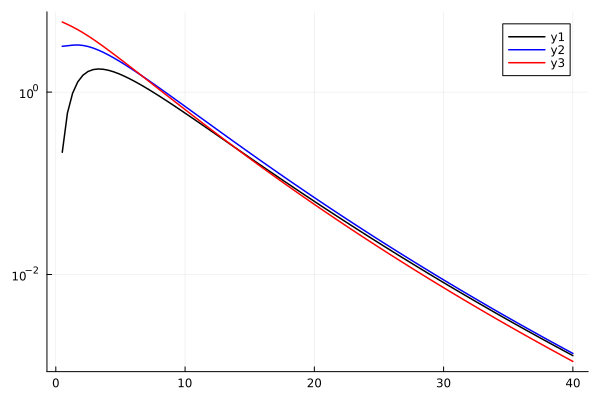

In [18]:
fsmall = ηAD(15, 8)/ηAD(125, 8)
fbh = 0.21
flarge = 1 - fbh - fsmall

# dsnb_3nu_NOSH_B_24_24_f21 = (fsmall .* dsnb_3nu_NOSH_B_24_24_small) .+ (flarge .* dsnb_3nu_NOSH_B_24_24_large) .+ (fbh .* dsnb_3nu_NOSH_B_24_24_bh)

# dsnb_3nu_NOQD_B_24_24_f21 = (fsmall .* flux_dict_NOQD_B[("small", true, -25.0, -25.0)]) .+ (flarge .* flux_dict_NOQD_B[("large", true, -25.0, -25.0)]) .+ (fbh .* flux_dict_NOQD_B[("bh", true, -25.0, -25.0)])

es_dsnb_test = range(0.5, 40, 100)
dsnb_nodecay = DSNB_freefbh.(es_dsnb_test, 0, true, "NO", 0.21, SNRnorm)
dsnb_2nu = dsnb_2ν_freefbh.(es_dsnb_test, -24.0, true, "NO", "1", 0.21)
dsnb_NO_B = dsnb_3ν_NO_freefbh.(es_dsnb_test, -26.0, -24.0, true, "B", 0.21)
dsnb_NO_C = dsnb_3ν_NO_freefbh.(es_dsnb_test, -24.0, -24.0, true, "C", 0.21)

plot(
    es_dsnb_test,
    [dsnb_nodecay dsnb_2nu dsnb_NO_C],
    yscale=:log10,
    c=[:black :blue :red],
    lw=1.5
)

In [5]:
# Reading in the precomputed fluxes

dsnb_fluxes_2ν_NO_dict = open("Data/model_matrix/dsnb_fluxes_2ν_NO_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_2ν_NOQD_dict = open("Data/model_matrix/dsnb_fluxes_2ν_NOQD_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_2ν_IO_dict = open("Data/model_matrix/dsnb_fluxes_2ν_IO_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_IO_C_dict = open("Data/model_matrix/dsnb_fluxes_IO_C_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_IO_B_dict = open("Data/model_matrix/dsnb_fluxes_IO_B_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_IO_D_dict = open("Data/model_matrix/dsnb_fluxes_IO_D_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_IO_I_dict = open("Data/model_matrix/dsnb_fluxes_IO_I_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_NOQD_B_dict = open("Data/model_matrix/dsnb_fluxes_NOQD_B_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_NOQD_C_dict = open("Data/model_matrix/dsnb_fluxes_NOQD_C_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_NO_B_dict = open("Data/model_matrix/dsnb_fluxes_NO_B_dict.dat", "r") do io
    deserialize(io)
end
dsnb_fluxes_NO_C_dict = open("Data/model_matrix/dsnb_fluxes_NO_C_dict.dat", "r") do io
    deserialize(io)
end


function dsnb_2ν_freefbh_precomp(logα, nubar, ordering, daughter, fbh)

    fsmall = ηAD(15, 8)/ηAD(125, 8)
    if 1 - fsmall - fbh < 0
        fbh = 0.41
    elseif fbh < 0.09
        fbh = 0.09
    end
    flarge = 1 - fsmall - fbh

    if ordering == "NO"
        return fsmall*dsnb_fluxes_2ν_NO_dict[(daughter, "small", nubar, logα)] .+ flarge*dsnb_fluxes_2ν_NO_dict[(daughter, "large", nubar, logα)] .+ fbh*dsnb_fluxes_2ν_NO_dict[(daughter, "bh", nubar, logα)]
    elseif ordering == "NOQD"
        return fsmall*dsnb_fluxes_2ν_NOQD_dict[(daughter, "small", nubar, logα)] .+ flarge*dsnb_fluxes_2ν_NOQD_dict[(daughter, "large", nubar, logα)] .+ fbh*dsnb_fluxes_2ν_NOQD_dict[(daughter, "bh", nubar, logα)]
    elseif ordering == "IO"
        return fsmall*dsnb_fluxes_2ν_IO_dict[(daughter, "small", nubar, logα)] .+ flarge*dsnb_fluxes_2ν_IO_dict[(daughter, "large", nubar, logα)] .+ fbh*dsnb_fluxes_2ν_IO_dict[(daughter, "bh", nubar, logα)]
    else
        return println("error: ordering must be 'NO' or 'IO'")
    end
end

function dsnb_2ν_freefbh(E, logα, nubar, ordering, daughter, fbh)
    es = range(0.5, 40, 100)
    dsnb_interp = Interpolations.interpolate((vec(es),), dsnb_2ν_freefbh_precomp(logα, nubar, ordering, daughter, fbh), Gridded(Linear()))
    dsnb = extrapolate(dsnb_interp, 0.0)
    return dsnb(E)
end

function dsnb_3ν_IO_freefbh_precomp(logα1, logα2, nubar, casechoice, fbh)

    fsmall = ηAD(15, 8)/ηAD(125, 8)
    if 1 - fsmall - fbh < 0
        fbh = 0.41
    elseif fbh < 0.09
        fbh = 0.09
    end
    flarge = 1 - fsmall - fbh

    if casechoice == "B"
        return fsmall*dsnb_fluxes_IO_B_dict[("small", nubar, logα1, logα2)] .+ flarge*dsnb_fluxes_IO_B_dict[("large", nubar, logα1, logα2)] .+ fbh*dsnb_fluxes_IO_B_dict[("bh", nubar, logα1, logα2)]
    elseif casechoice == "C"
        return fsmall*dsnb_fluxes_IO_C_dict[("small", nubar, logα1, logα2)] .+ flarge*dsnb_fluxes_IO_C_dict[("large", nubar, logα1, logα2)] .+ fbh*dsnb_fluxes_IO_C_dict[("bh", nubar, logα1, logα2)]
    elseif casechoice == "D"
        return fsmall*dsnb_fluxes_IO_D_dict[("small", nubar, logα1, logα2)] .+ flarge*dsnb_fluxes_IO_D_dict[("large", nubar, logα1, logα2)] .+ fbh*dsnb_fluxes_IO_D_dict[("bh", nubar, logα1, logα2)]
    elseif casechoice == "I"
        return fsmall*dsnb_fluxes_IO_I_dict[("small", nubar, logα1, logα2)] .+ flarge*dsnb_fluxes_IO_I_dict[("large", nubar, logα1, logα2)] .+ fbh*dsnb_fluxes_IO_I_dict[("bh", nubar, logα1, logα2)]
    else
        return zeros(100)
    end
end

function dsnb_3ν_IO_freefbh(E, logα1, logα2, nubar, casechoice, fbh)
    es = range(0.5, 40, 100)
    dsnb_interp = Interpolations.interpolate((vec(es),), dsnb_3ν_IO_freefbh_precomp(logα1, logα2, nubar, casechoice, fbh), Gridded(Linear()))
    dsnb = extrapolate(dsnb_interp, 0.0)
    return dsnb(E)
end

function dsnb_3ν_NOQD_freefbh_precomp(logα1, logα2, nubar, casechoice, fbh)

    fsmall = ηAD(15, 8)/ηAD(125, 8)
    if 1 - fsmall - fbh < 0
        fbh = 0.41
    elseif fbh < 0.09
        fbh = 0.09
    end
    flarge = 1 - fsmall - fbh

    if casechoice == "B"
        return fsmall*dsnb_fluxes_NOQD_B_dict[("small", nubar, logα1, logα2)] .+ flarge*dsnb_fluxes_NOQD_B_dict[("large", nubar, logα1, logα2)] .+ fbh*dsnb_fluxes_NOQD_B_dict[("bh", nubar, logα1, logα2)]
    elseif casechoice == "C"
        return fsmall*dsnb_fluxes_NOQD_C_dict[("small", nubar, logα1, logα2)] .+ flarge*dsnb_fluxes_NOQD_C_dict[("large", nubar, logα1, logα2)] .+ fbh*dsnb_fluxes_NOQD_C_dict[("bh", nubar, logα1, logα2)]
    else
        return zeros(100)
    end
end

function dsnb_3ν_NOQD_freefbh(E, logα1, logα2, nubar, casechoice, fbh)
    es = range(0.5, 40, 100)
    dsnb_interp = Interpolations.interpolate((vec(es),), dsnb_3ν_NOQD_freefbh_precomp(logα1, logα2, nubar, casechoice, fbh), Gridded(Linear()))
    dsnb = extrapolate(dsnb_interp, 0.0)
    return dsnb(E)
end

function dsnb_3ν_NO_freefbh_precomp(logα1, logα2, nubar, casechoice, fbh)

    fsmall = ηAD(15, 8)/ηAD(125, 8)
    if 1 - fsmall - fbh < 0
        fbh = 0.41
    elseif fbh < 0.09
        fbh = 0.09
    end
    flarge = 1 - fsmall - fbh

    if casechoice == "B"
        return fsmall*dsnb_fluxes_NO_B_dict[("small", nubar, logα1, logα2)] .+ flarge*dsnb_fluxes_NO_B_dict[("large", nubar, logα1, logα2)] .+ fbh*dsnb_fluxes_NO_B_dict[("bh", nubar, logα1, logα2)]
    elseif casechoice == "C"
        return fsmall*dsnb_fluxes_NO_C_dict[("small", nubar, logα1, logα2)] .+ flarge*dsnb_fluxes_NO_C_dict[("large", nubar, logα1, logα2)] .+ fbh*dsnb_fluxes_NO_C_dict[("bh", nubar, logα1, logα2)]
    else
        return zeros(100)
    end
end

function dsnb_3ν_NO_freefbh(E, logα1, logα2, nubar, casechoice, fbh)
    es = range(0.5, 40, 100)
    dsnb_interp = Interpolations.interpolate((vec(es),), dsnb_3ν_NO_freefbh_precomp(logα1, logα2, nubar, casechoice, fbh), Gridded(Linear()))
    dsnb = extrapolate(dsnb_interp, 0.0)
    return dsnb(E)
end;

In [19]:
dsnb_3ν_NO_freefbh(1, -24.0, -24.0, true, "B", 0.21)

5.909213879634908

In [20]:
# Detector stuff

nueCCxc_data = readdlm("Data/nueCC_xc.txt")

nueCC_es = 10 .^ nueCCxc_data[:,1] # GeV
σ_νeCC_vec = nueCCxc_data[:,2] .* nueCC_es .* 1e-38

σ_νeCC_interp = Interpolations.interpolate((vec(nueCC_es)*1000,), σ_νeCC_vec, Gridded(Linear()))
σ_νeCC = extrapolate(σ_νeCC_interp, 0.0)

KνeCC(u, v) = (1/(0.2*v*sqrt(2*π)))*exp(-((u-v)/(0.2*v*sqrt(2)))^2)
binint_KνeCC(Ertrue, Erreco_min, Erreco_max) = quadgk(Ereco -> KνeCC(Ertrue, Ereco), Erreco_min, Erreco_max)[1]


Δ = mass_neutron - mass_proton

# Response function
# K(u, v, experiment, channel) = (1/(δ(v, experiment, channel)*sqrt(2*π)))*exp(-((u-v)/(δ(v, experiment, channel)*sqrt(2)))^2)
σIBD(Eν) = 10^(-43) * sqrt((Eν - Δ)^2 - mass_e^2)*(Eν - Δ)*Eν^(-0.07056 + 0.02018*log(Eν) - 0.001953*(log(Eν)^3))

# Antiderivative wrt v (which is e_reco)
antiKIBD(u, v) = 0.5*(1 - erf((5*sqrt(2)*(u-v))/sqrt(v)) + expnew(200*u)*(erf((5*sqrt(2)*(u+v))/sqrt(v)) - 1))

binint_KIBD(Eetrue, Eereco_min, Eereco_max) = antiKIBD(Eetrue, Eereco_max) - antiKIBD(Eetrue, Eereco_min)


function Nt_ϵ(exp)
    if exp == "HK"
        return (2.5e34, 0.67)
    elseif exp == "JUNO"
        return (1.2e33, 0.5)
    elseif exp == "DUNE"
        return (6.02e32, 0.86)
    else
        return println("Invalid experiment choice")
    end
end

function σ(Eν, exp)
    if exp == "HK" || exp == "JUNO"
        return σIBD(Eν)
    elseif exp == "DUNE"
        return σ_νeCC(Eν)
    else
        return println("Invalid experiment choice")
    end
end

function binint_K(Et, Er_min, Er_max, exp)
    if exp == "HK" || exp == "JUNO"
        return binint_KIBD(Et, Er_min, Er_max)
    elseif exp == "DUNE"
        return binint_KνeCC(Et, Er_min, Er_max)
    else
        return println("Invalid experiment choice")
    end
end

function diff_event_rate_2ν(E, α, ordering, daughter, fbh, normchoice, exp)
    Eν = E + Δ
    if exp == "DUNE"
        nubar = false
    else
        nubar = true
    end
    if α == 0.0
        return σ(Eν, exp) * DSNB_freefbh(Eν, 0.0, nubar, ordering, fbh, normchoice)
    else
        return σ(Eν, exp) * dsnb_2ν_freefbh(Eν, log10(α), nubar, ordering, string(daughter), fbh)
    end
end

function event_rate_2ν(Emin, Emax, α, ordering, daughter, fbh, normchoice, yrs, exp)
    if exp == "DUNE"
        Etmin, Etmax = maximum([0, (Emin - 4*0.2*Emin)]), Emax + 4*0.2*Emax
    else
        Etmin, Etmax = maximum([0, (Emin - 4*0.1*sqrt(Emin))]), Emax + 4*0.1*sqrt(Emax)
    end
    Nt, ϵ = Nt_ϵ(exp)
    τ = yrs*525600*60
    return τ * Nt * ϵ * quadgk(Et -> 
        diff_event_rate_2ν(Et, α, ordering, daughter, fbh, normchoice, exp)*binint_K(Et, Emin, Emax, exp), Etmin, Etmax, rtol=1e-3)[1]
end

function diff_event_rate_3ν_IO(E, α1, α2, casechoice, fbh, normchoice, exp)
    Eν = E + Δ
    if exp == "DUNE"
        nubar = false
    else
        nubar = true
    end
    if α1 == 0.0 && α2 == 0.0
        return σ(Eν, exp) * DSNB_freefbh(Eν, 0.0, nubar, "IO", fbh, normchoice)
    else
        return σ(Eν, exp) * dsnb_3ν_IO_freefbh(Eν, log10(α1), log10(α2), nubar, casechoice, fbh)
    end
end

function event_rate_3ν_IO(Emin, Emax, α1, α2, casechoice, fbh, normchoice, yrs, exp)
    if exp == "DUNE"
        Etmin, Etmax = maximum([0, (Emin - 4*0.2*Emin)]), Emax + 4*0.2*Emax
    else
        Etmin, Etmax = maximum([0, (Emin - 4*0.1*sqrt(Emin))]), Emax + 4*0.1*sqrt(Emax)
    end
    Nt, ϵ = Nt_ϵ(exp)
    τ = yrs*525600*60
    return τ * Nt * ϵ * quadgk(Et -> 
        diff_event_rate_3ν_IO(Et, α1, α2, casechoice, fbh, normchoice, exp)*binint_K(Et, Emin, Emax, exp), Etmin, Etmax, rtol=1e-3)[1]
end

function diff_event_rate_3ν_NOQD(E, α1, α2, casechoice, fbh, normchoice, exp)
    Eν = E + Δ
    if exp == "DUNE"
        nubar = false
    else
        nubar = true
    end
    if α1 == 0.0 && α2 == 0.0
        return σ(Eν, exp) * DSNB_freefbh(Eν, 0.0, nubar, "NO", fbh, normchoice)
    else
        return σ(Eν, exp) * dsnb_3ν_NOQD_freefbh(Eν, log10(α1), log10(α2), nubar, casechoice, fbh)
    end
end

function event_rate_3ν_NOQD(Emin, Emax, α1, α2, casechoice, fbh, normchoice, yrs, exp)
    if exp == "DUNE"
        Etmin, Etmax = maximum([0, (Emin - 4*0.2*Emin)]), Emax + 4*0.2*Emax
    else
        Etmin, Etmax = maximum([0, (Emin - 4*0.1*sqrt(Emin))]), Emax + 4*0.1*sqrt(Emax)
    end
    Nt, ϵ = Nt_ϵ(exp)
    τ = yrs*525600*60
    return τ * Nt * ϵ * quadgk(Et -> 
        diff_event_rate_3ν_NOQD(Et, α1, α2, casechoice, fbh, normchoice, exp)*binint_K(Et, Emin, Emax, exp), Etmin, Etmax, rtol=1e-3)[1]
end

function diff_event_rate_3ν_NO(E, α1, α2, casechoice, fbh, normchoice, exp)
    Eν = E + Δ
    if exp == "DUNE"
        nubar = false
    else
        nubar = true
    end
    if α1 == 0.0 && α2 == 0.0
        return σ(Eν, exp) * DSNB_freefbh(Eν, 0.0, nubar, "NO", fbh, normchoice)
    else
        return σ(Eν, exp) * dsnb_3ν_NO_freefbh(Eν, log10(α1), log10(α2), nubar, casechoice, fbh)
    end
end

function event_rate_3ν_NO(Emin, Emax, α1, α2, casechoice, fbh, normchoice, yrs, exp)
    if exp == "DUNE"
        Etmin, Etmax = maximum([0, (Emin - 4*0.2*Emin)]), Emax + 4*0.2*Emax
    else
        Etmin, Etmax = maximum([0, (Emin - 4*0.1*sqrt(Emin))]), Emax + 4*0.1*sqrt(Emax)
    end
    Nt, ϵ = Nt_ϵ(exp)
    τ = yrs*525600*60
    return τ * Nt * ϵ * quadgk(Et -> 
        diff_event_rate_3ν_NO(Et, α1, α2, casechoice, fbh, normchoice, exp)*binint_K(Et, Emin, Emax, exp), Etmin, Etmax, rtol=1e-3)[1]
end

function event_rate_3ν(ordering, Emin, Emax, α1, α2, casechoice, fbh, normchoice, yrs, exp)
    if ordering == "IO"
        return event_rate_3ν_IO(Emin, Emax, α1, α2, casechoice, fbh, normchoice, yrs, exp)
    elseif ordering == "NO"
        return event_rate_3ν_NO(Emin, Emax, α1, α2, casechoice, fbh, normchoice, yrs, exp)
    elseif ordering == "NOQD"
        return event_rate_3ν_NOQD(Emin, Emax, α1, α2, casechoice, fbh, normchoice, yrs, exp)
    else
        return println("ordering hasn't been implemented yet")
    end
end;

In [21]:
# Compiling all of the event rate functions to save time later

compile1 = diff_event_rate_2ν(1, 1e-24, "NOQD", 2, 0.21, SNRnorm, "HK")
compile2 = diff_event_rate_2ν(1, 1e-24, "NOQD", "alt", 0.21, SNRnorm, "HK")

compile3 = event_rate_2ν(12, 14, 1e-24, "NOQD", 2, 0.21, SNRnorm, 20, "HK")
compile4 = event_rate_2ν(12, 14, 1e-24, "NOQD", "alt", 0.21, SNRnorm, 20, "HK")

compile5 = diff_event_rate_3ν_IO(19, 1e-27, 1e-25, "C", 0.21, SNRnorm, "DUNE")
compile6 = event_rate_3ν_IO(19, 21, 1e-27, 1e-25, "C", 0.21, SNRnorm, 20, "DUNE")

compile7 = diff_event_rate_3ν_NOQD(19, 1e-27, 1e-25, "B", 0.21, SNRnorm, "DUNE")
compile8 = event_rate_3ν_NOQD(19, 21, 1e-27, 1e-25, "B", 0.21, SNRnorm, 20, "DUNE")

compile9 = event_rate_3ν("NO", 19, 21, 1e-27, 1e-25, "B", 0.21, SNRnorm, 20, "DUNE");

In [22]:
# Reading in the backgrounds
HK_ebin_lowerbnds, HK_atmCC_vec = [readdlm("Data/dsnb_backgrounds/HK_atmCC.csv", ',')[:, i] for i in 1:2]
HK_atmNC_vec = readdlm("Data/dsnb_backgrounds/HK_atmNC.csv", ',')[:, 2]
HK_invismuon_vec = readdlm("Data/dsnb_backgrounds/HK_invismuon.csv", ',')[:, 2]
HK_li9spallation_vec = readdlm("Data/dsnb_backgrounds/HK_li9spallation.csv", ',')[:, 2]

JUNO_ebin_lowerbnds, JUNO_atmCC_vec = [readdlm("Data/dsnb_backgrounds/JUNO_atmCC.csv", ',')[:, i] for i in 1:2]
JUNO_atmNC_vec = readdlm("Data/dsnb_backgrounds/JUNO_atmNC.csv", ',')[:, 2]

DUNE_ebin_lowerbnds, DUNE_atmCC_vec = [readdlm("Data/dsnb_backgrounds/DUNE_atmCC.csv", ',')[:, i] for i in 1:2]

function emins_exp(exp)
    if exp == "HK"
        return 12:2:30
    elseif exp == "JUNO"
        return 10:2:32
    elseif exp == "DUNE"
        return 19:2:29
    else
        return println("Invalid experiment choice")
    end
end

background_HK(i, ηCC, ηNC, ηiμ, ηLi, years) = (years/20)*(ηCC*HK_atmCC_vec[i] + ηNC*HK_atmNC_vec[i] + ηiμ*HK_invismuon_vec[i] + ηLi*HK_li9spallation_vec[i])
background_JUNO(i, ηCC, ηNC, years) = (years/20)*(ηCC*JUNO_atmCC_vec[i] + ηNC*JUNO_atmNC_vec[i])
background_DUNE(i, ηCC, years) = (years/20)*(ηCC*DUNE_atmCC_vec[i]);

In [23]:
# The χ² functions

# Unminimized χ², fixed fbh with NC
function χ2_um(ξ, ηCC, ηNC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)
    if exp == "HK"
        χ0 = [((1+ξ)*altsig[i] + background_HK(i, ηCC, ηNC, ηiμ, ηLi, years) - nullsig[i] + 
            (nullsig[i] + background_HK(i, 1.0, 1.0, 1.0, 1.0, years))
            *log((nullsig[i] + background_HK(i, 1.0, 1.0, 1.0, 1.0, years))/((1+ξ)*altsig[i] + background_HK(i, 1+ηCC, 1+ηNC, 1+ηiμ, 1+ηLi, years)))) for i in 1:length(emins_exp("HK"))]
        return sum(χ0) + (ξ/σRSN)^2 + (ηCC/σn)^2 + (ηNC/σn)^2 + (ηiμ/σn)^2 + (ηLi/σn)^2
    elseif exp == "JUNO"
        χ0 = [((1+ξ)*altsig[i] + background_JUNO(i, ηCC, ηNC, years) - nullsig[i] + 
            (nullsig[i] + background_JUNO(i, 1.0, 1.0, years))
            *log((nullsig[i] + background_JUNO(i, 1.0, 1.0, years))/((1+ξ)*altsig[i] + background_JUNO(i, 1+ηCC, 1+ηNC, years)))) for i in 1:length(emins_exp("JUNO"))]
        return sum(χ0) + (ξ/σRSN)^2 + (ηCC/σn)^2 + (ηNC/σn)^2
    elseif exp == "DUNE"
        χ0 = [((1+ξ)*altsig[i] + background_DUNE(i, ηCC, years) - nullsig[i] + 
            (nullsig[i] + background_DUNE(i, 1.0, years))
            *log((nullsig[i] + background_DUNE(i, 1.0, years))/((1+ξ)*altsig[i] + background_DUNE(i, 1+ηCC, years)))) for i in 1:length(emins_exp("DUNE"))]
        return sum(χ0) + (ξ/σRSN)^2 + (ηCC/σn)^2
    else
        return println("Invalid experiment choice")
    end
end

# Unminimized χ², fixed fbh without NC
function χ2_um(ξ, ηCC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)
    if exp == "HK"
        χ0 = [((1+ξ)*altsig[i] + background_HK(i, ηCC, 0.0, ηiμ, ηLi, years) - nullsig[i] + 
            (nullsig[i] + background_HK(i, 1.0, 0.0, 1.0, 1.0, years))
            *log((nullsig[i] + background_HK(i, 1.0, 0.0, 1.0, 1.0, years))/((1+ξ)*altsig[i] + background_HK(i, 1+ηCC, 0.0, 1+ηiμ, 1+ηLi, years)))) for i in 1:length(emins_exp("HK"))]
        return sum(χ0) + (ξ/σRSN)^2 + (ηCC/σn)^2 + (ηiμ/σn)^2 + (ηLi/σn)^2
    elseif exp == "JUNO"
        χ0 = [((1+ξ)*altsig[i] + background_JUNO(i, ηCC, 0.0, years) - nullsig[i] + 
            (nullsig[i] + background_JUNO(i, 1.0, 0.0, years))
            *log((nullsig[i] + background_JUNO(i, 1.0, 0.0, years))/((1+ξ)*altsig[i] + background_JUNO(i, 1+ηCC, 0.0, years)))) for i in 1:length(emins_exp("JUNO"))]
        return sum(χ0) + (ξ/σRSN)^2 + (ηCC/σn)^2
    elseif exp == "DUNE"
        χ0 = [((1+ξ)*altsig[i] + background_DUNE(i, ηCC, years) - nullsig[i] + 
            (nullsig[i] + background_DUNE(i, 1.0, years))
            *log((nullsig[i] + background_DUNE(i, 1.0, years))/((1+ξ)*altsig[i] + background_DUNE(i, 1+ηCC, years)))) for i in 1:length(emins_exp("DUNE"))]
        return sum(χ0) + (ξ/σRSN)^2 + (ηCC/σn)^2
    else
        return println("Invalid experiment choice")
    end
end

# Unminimized χ², free fbh with NC, 2ν
function χ2_um(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsig, σRSN, σn, α::Float64, ordering::String, daughter, exp, years)
    emins, emaxes = emins_exp(exp), emins_exp(exp) .+ 2
    altsig = event_rate_2ν.(emins, emaxes, α, ordering, daughter, fbh, SNRnorm, years, exp)
    return χ2_um(ξ, ηCC, ηNC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)
end

# Unminimized χ², free fbh without NC, 2ν
function χ2_um(fbh, ξ, ηCC, ηiμ, ηLi, nullsig, σRSN, σn, α::Float64, ordering::String, daughter, exp, years)
    emins, emaxes = emins_exp(exp), emins_exp(exp) .+ 2
    altsig = event_rate_2ν.(emins, emaxes, α, ordering, daughter, fbh, SNRnorm, years, exp)
    return χ2_um(ξ, ηCC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)
end

# Unminimized χ², free fbh with NC, 3ν
function χ2_um(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsig, σRSN, σn, ordering, α1::Float64, α2::Float64, casechoice::String, exp, years)
    emins, emaxes = emins_exp(exp), emins_exp(exp) .+ 2
    altsig = event_rate_3ν.(ordering, emins, emaxes, α1, α2, casechoice, fbh, SNRnorm, years, exp)
    return χ2_um(ξ, ηCC, ηNC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)
end

# Unminimized χ², free fbh without NC, 3ν
function χ2_um(fbh, ξ, ηCC, ηiμ, ηLi, nullsig, σRSN, σn, ordering, α1::Float64, α2::Float64, casechoice::String, exp, years)
    emins, emaxes = emins_exp(exp), emins_exp(exp) .+ 2
    altsig = event_rate_3ν.(ordering, emins, emaxes, α1, α2, casechoice, fbh, SNRnorm, years, exp)
    return χ2_um(ξ, ηCC, ηiμ, ηLi, nullsig, altsig, σRSN, σn, exp, years)
end

# Combined unminimized χ², free fbh with NC, 2ν
function χ2_um_combined(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, α::Float64, ordering::String, daughter, years)
    return (χ2_um(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, σRSN, σn, α, ordering, daughter, "HK", years)
    + χ2_um(fbh, ξ, ηCC, ηNC, 0.0, 0.0, nullsigJUNO, σRSN, σn, α, ordering, daughter, "JUNO", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigDUNE, σRSN, σn, α, ordering, daughter, "DUNE", years))
end

# Combined unminimized χ², free fbh without NC, 2ν
function χ2_um_combined(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, α::Float64, ordering::String, daughter, years)
    return (χ2_um(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, σRSN, σn, α, ordering, daughter, "HK", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigJUNO, σRSN, σn, α, ordering, daughter, "JUNO", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigDUNE, σRSN, σn, α, ordering, daughter, "DUNE", years))
end

# Combined unminimized χ², free fbh with NC, 3ν
function χ2_um_combined(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, ordering, α1::Float64, α2::Float64, casechoice::String, years)
    return (χ2_um(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, σRSN, σn, ordering, α1, α2, casechoice, "HK", years)
    + χ2_um(fbh, ξ, ηCC, ηNC, 0.0, 0.0, nullsigJUNO, σRSN, σn, ordering, α1, α2, casechoice, "JUNO", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigDUNE, σRSN, σn, ordering, α1, α2, casechoice, "DUNE", years))
end

# Combined unminimized χ², free fbh without NC, 3ν
function χ2_um_combined(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, ordering, α1::Float64, α2::Float64, casechoice::String, years)
    return (χ2_um(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, σRSN, σn, ordering, α1, α2, casechoice, "HK", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigJUNO, σRSN, σn, ordering, α1, α2, casechoice, "JUNO", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigDUNE, σRSN, σn, ordering, α1, α2, casechoice, "DUNE", years))
end

# Combined unmiminized χ², fixed fbh with NC
function χ2_um_combined(ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE, σRSN, σn, years)
    return (χ2_um(ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, altsigHK, σRSN, σn, "HK", years)
    + χ2_um(ξ, ηCC, ηNC, 0.0, 0.0, nullsigJUNO, altsigJUNO, σRSN, σn, "JUNO", years)
    + χ2_um(ξ, ηCC, 0.0, 0.0, nullsigDUNE, altsigDUNE, σRSN, σn, "DUNE", years))
end

# Combined unmiminized χ², fixed fbh without NC
function χ2_um_combined(ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE, σRSN, σn, years)
    return (χ2_um(ξ, ηCC, ηiμ, ηLi, nullsigHK, altsigHK, σRSN, σn, "HK", years)
    + χ2_um(ξ, ηCC, 0.0, 0.0, nullsigJUNO, altsigJUNO, σRSN, σn, "JUNO", years)
    + χ2_um(ξ, ηCC, 0.0, 0.0, nullsigDUNE, altsigDUNE, σRSN, σn, "DUNE", years))
end

# HK+JUNO unminimized χ², free fbh with NC, 2ν
function χ2_um_HKJUNO(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, σRSN, σn, α::Float64, ordering::String, daughter, years)
    return (χ2_um(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, σRSN, σn, α, ordering, daughter, "HK", years)
    + χ2_um(fbh, ξ, ηCC, ηNC, 0.0, 0.0, nullsigJUNO, σRSN, σn, α, ordering, daughter, "JUNO", years))
end

# HK+JUNO unminimized χ², free fbh without NC, 2ν
function χ2_um_HKJUNO(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, σRSN, σn, α::Float64, ordering::String, daughter, years)
    return (χ2_um(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, σRSN, σn, α, ordering, daughter, "HK", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigJUNO, σRSN, σn, α, ordering, daughter, "JUNO", years))
end

# HK+JUNO unminimized χ², free fbh with NC, 3ν
function χ2_um_HKJUNO(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, σRSN, σn, ordering, α1::Float64, α2::Float64, casechoice::String, years)
    return (χ2_um(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, σRSN, σn, ordering, α1, α2, casechoice, "HK", years)
    + χ2_um(fbh, ξ, ηCC, ηNC, 0.0, 0.0, nullsigJUNO, σRSN, σn, ordering, α1, α2, casechoice, "JUNO", years))
end

# HK+JUNO unminimized χ², free fbh without NC, 3ν
function χ2_um_HKJUNO(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, σRSN, σn, ordering, α1::Float64, α2::Float64, casechoice::String, years)
    return (χ2_um(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, σRSN, σn, ordering, α1, α2, casechoice, "HK", years)
    + χ2_um(fbh, ξ, ηCC, 0.0, 0.0, nullsigJUNO, σRSN, σn, ordering, α1, α2, casechoice, "JUNO", years))
end

# HK+JUNO unmiminized χ², fixed fbh with NC
function χ2_um_HKJUNO(ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, altsigHK, altsigJUNO, σRSN, σn, years)
    return (χ2_um(ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, altsigHK, σRSN, σn, "HK", years)
    + χ2_um(ξ, ηCC, ηNC, 0.0, 0.0, nullsigJUNO, altsigJUNO, σRSN, σn, "JUNO", years))
end

# HK+JUNO unmiminized χ², fixed fbh without NC
function χ2_um_HKJUNO(ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, altsigHK, altsigJUNO, σRSN, σn, years)
    return (χ2_um(ξ, ηCC, ηiμ, ηLi, nullsigHK, altsigHK, σRSN, σn, "HK", years)
    + χ2_um(ξ, ηCC, 0.0, 0.0, nullsigJUNO, altsigJUNO, σRSN, σn, "JUNO", years))
end




fbh_inits = [0.10, 0.15, 0.21, 0.35]

x0s_wNC_HK = [vcat(fbh_init, zeros(5)) for fbh_init in fbh_inits]
x0s_noNC_HK = [vcat(fbh_init, zeros(4)) for fbh_init in fbh_inits]

x0s_wNC_JUNO = [vcat(fbh_init, zeros(3)) for fbh_init in fbh_inits]
x0s_noNC_JUNO = [vcat(fbh_init, zeros(2)) for fbh_init in fbh_inits]

x0s_DUNE = [vcat(fbh_init, zeros(2)) for fbh_init in fbh_inits]


# Full minimized χ² functions

function χ2_2ν(α, ordering, daughter, σRSN, σn, freefbh, withNC, exp, years)

    if exp == "HK"
        emins, emaxes = emins_exp("HK"), emins_exp("HK") .+ 2
        nullsig = event_rate_2ν.(emins, emaxes, 0.0, ordering, daughter, 0.21, SNRnorm, years, "HK")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], x[5], x[6], nullsig, σRSN, σn, α, ordering, daughter, "HK", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
            else
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], x[5], nullsig, σRSN, σn, α, ordering, daughter, "HK", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
            end
        else
            altsig = event_rate_2ν.(emins, emaxes, α, ordering, daughter, 0.21, SNRnorm, years, "HK")
            if withNC
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], x[5], nullsig, altsig, σRSN, σn, "HK", years), 
                    zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], nullsig, altsig, σRSN, σn, "HK", years), 
                    zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    elseif exp == "JUNO"
        emins, emaxes = emins_exp("JUNO"), emins_exp("JUNO") .+ 2
        nullsig = event_rate_2ν.(emins, emaxes, 0.0, ordering, daughter, 0.21, SNRnorm, years, "JUNO")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], 0.0, 0.0, nullsig, σRSN, σn, α, ordering, daughter, "JUNO", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_JUNO]
            else
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], 0.0, 0.0, nullsig, σRSN, σn, α, ordering, daughter, "JUNO", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_JUNO]
            end
        else
            altsig = event_rate_2ν.(emins, emaxes, α, ordering, daughter, 0.21, SNRnorm, years, "JUNO")
            if withNC
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], x[3], 0.0, 0.0, nullsig, altsig, σRSN, σn, "JUNO", years), 
                    zeros(3), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], 0.0, 0.0, nullsig, altsig, σRSN, σn, "JUNO", years), 
                    zeros(2), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    elseif exp == "DUNE"
        emins, emaxes = emins_exp("DUNE"), emins_exp("DUNE") .+ 2
        nullsig = event_rate_2ν.(emins, emaxes, 0.0, ordering, daughter, 0.21, SNRnorm, years, "DUNE")
        if freefbh
            optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], 0.0, 0.0, nullsig, σRSN, σn, α, ordering, daughter, "DUNE", years), 
                x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_DUNE]
        else
            altsig = event_rate_2ν.(emins, emaxes, α, ordering, daughter, 0.21, SNRnorm, years, "DUNE")
            optimized = Optim.optimize(x -> χ2_um(x[1], x[2], 0.0, 0.0, nullsig, altsig, σRSN, σn, "DUNE", years), 
                zeros(2), NelderMead(), Optim.Options(g_tol=1e-3))
        end
    elseif exp == "combined"
        nullsigHK = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, ordering, daughter, 0.21, SNRnorm, years, "HK")
        nullsigJUNO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, ordering, daughter, 0.21, SNRnorm, years, "JUNO")
        nullsigDUNE = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, ordering, daughter, 0.21, SNRnorm, years, "DUNE")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5], x[6],
                    nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, α, ordering, daughter, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
            else
                optimizeds = [Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5],
                    nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, α, ordering, daughter, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
            end
        else
            altsigHK = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, α, ordering, daughter, 0.21, SNRnorm, years, "HK")
            altsigJUNO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, α, ordering, daughter, 0.21, SNRnorm, years, "JUNO")
            altsigDUNE = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, α, ordering, daughter, 0.21, SNRnorm, years, "DUNE")
            if withNC
                optimized = Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5], nullsigHK, 
                nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE,
                σRSN, σn, years),
                zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], nullsigHK, 
                nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE,
                σRSN, σn, years),
                zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    elseif exp == "HK+JUNO"
        nullsigHK = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, ordering, daughter, 0.21, SNRnorm, years, "HK")
        nullsigJUNO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, ordering, daughter, 0.21, SNRnorm, years, "JUNO")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], x[5], x[6],
                    nullsigHK, nullsigJUNO, σRSN, σn, α, ordering, daughter, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
            else
                optimizeds = [Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], x[5],
                    nullsigHK, nullsigJUNO, σRSN, σn, α, ordering, daughter, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
            end
        else
            altsigHK = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, α, ordering, daughter, 0.21, SNRnorm, years, "HK")
            altsigJUNO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, α, ordering, daughter, 0.21, SNRnorm, years, "JUNO")
            if withNC
                optimized = Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], x[5], nullsigHK, 
                nullsigJUNO, altsigHK, altsigJUNO, σRSN, σn, years),
                zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], nullsigHK, 
                nullsigJUNO, altsigHK, altsigJUNO, σRSN, σn, years),
                zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end

    else
        return println("Error: invalid experiment choice")
    end

    if freefbh
        minims, minimizers = [optimized.minimum for optimized in optimizeds], [optimized.minimizer for optimized in optimizeds]
        min_χ2, minimizer = minimum(minims), minimizers[argmin(minims)]

        if minimizer[1] < 0.09
            minimizer[1] = 0.09
        elseif minimizer[1] > 0.41
            minimizer[1] = 0.41
        end
        return min_χ2, minimizer
    else
        return optimized.minimum, optimized.minimizer
    end
end

function χ2_3ν(ordering, α1, α2, casechoice, σRSN, σn, freefbh, withNC, exp, years)

    if exp == "HK"
        emins, emaxes = emins_exp("HK"), emins_exp("HK") .+ 2
        nullsig = event_rate_3ν.(ordering, emins, emaxes, 0.0, 0.0, "I", 0.21, SNRnorm, years, "HK")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], x[5], x[6], nullsig, σRSN, σn, ordering, α1, α2, casechoice, "HK", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
            else
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], x[5], nullsig, σRSN, σn, ordering, α1, α2, casechoice, "HK", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
            end
        else
            altsig = event_rate_3ν.(ordering, emins, emaxes, α1, α2, casechoice, 0.21, SNRnorm, years, "HK")
            if withNC
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], x[5], nullsig, altsig, σRSN, σn, "HK", years), 
                    zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], nullsig, altsig, σRSN, σn, "HK", years), 
                    zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    elseif exp == "JUNO"
        emins, emaxes = emins_exp("JUNO"), emins_exp("JUNO") .+ 2
        nullsig = event_rate_3ν.(ordering, emins, emaxes, 0.0, 0.0, "I", 0.21, SNRnorm, years, "JUNO")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], x[4], 0.0, 0.0, nullsig, σRSN, σn, ordering, α1, α2, casechoice, "JUNO", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_JUNO]
            else
                optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], 0.0, 0.0, nullsig, σRSN, σn, ordering, α1, α2, casechoice, "JUNO", years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_JUNO]
            end
        else
            altsig = event_rate_3ν.(ordering, emins, emaxes, α1, α2, casechoice, 0.21, SNRnorm, years, "JUNO")
            if withNC
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], x[3], 0.0, 0.0, nullsig, altsig, σRSN, σn, "JUNO", years), 
                    zeros(3), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um(x[1], x[2], 0.0, 0.0, nullsig, altsig, σRSN, σn, "JUNO", years), 
                    zeros(2), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    elseif exp == "DUNE"
        emins, emaxes = emins_exp("DUNE"), emins_exp("DUNE") .+ 2
        nullsig = event_rate_3ν.(ordering, emins, emaxes, 0.0, 0.0, "I", 0.21, SNRnorm, years, "DUNE")
        if freefbh
            optimizeds = [Optim.optimize(x -> χ2_um(x[1], x[2], x[3], 0.0, 0.0, nullsig, σRSN, σn, ordering, α1, α2, casechoice, "DUNE", years), 
                x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_DUNE]
        else
            altsig = event_rate_3ν.(ordering, emins, emaxes, α1, α2, casechoice, 0.21, SNRnorm, years, "DUNE")
            optimized = Optim.optimize(x -> χ2_um(x[1], x[2], 0.0, 0.0, nullsig, altsig, σRSN, σn, "DUNE", years), 
                zeros(2), NelderMead(), Optim.Options(g_tol=1e-3))
        end
    elseif exp == "combined"
        nullsigHK = event_rate_3ν.(ordering, emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, 0.0, "I", 0.21, SNRnorm, years, "HK")
        nullsigJUNO = event_rate_3ν.(ordering, emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, 0.0, "I", 0.21, SNRnorm, years, "JUNO")
        nullsigDUNE = event_rate_3ν.(ordering, emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, 0.0, "I", 0.21, SNRnorm, years, "DUNE")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5], x[6],
                    nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, ordering, α1, α2, casechoice, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
            else
                optimizeds = [Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5],
                    nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, ordering, α1, α2, casechoice, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
            end
        else
            altsigHK = event_rate_3ν.(ordering, emins_exp("HK"), emins_exp("HK") .+ 2, α1, α2, casechoice, 0.21, SNRnorm, years, "HK")
            altsigJUNO = event_rate_3ν.(ordering, emins_exp("JUNO"), emins_exp("JUNO") .+ 2, α1, α2, casechoice, 0.21, SNRnorm, years, "JUNO")
            altsigDUNE = event_rate_3ν.(ordering, emins_exp("DUNE"), emins_exp("DUNE") .+ 2, α1, α2, casechoice, 0.21, SNRnorm, years, "DUNE")
            if withNC
                optimized = Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5], nullsigHK, 
                nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE,
                σRSN, σn, years),
                zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], nullsigHK, 
                nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE,
                σRSN, σn, years),
                zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    elseif exp == "HK+JUNO"
        nullsigHK = event_rate_3ν.(ordering, emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, 0.0, "I", 0.21, SNRnorm, years, "HK")
        nullsigJUNO = event_rate_3ν.(ordering, emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, 0.0, "I", 0.21, SNRnorm, years, "JUNO")
        if freefbh
            if withNC
                optimizeds = [Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], x[5], x[6],
                    nullsigHK, nullsigJUNO, σRSN, σn, ordering, α1, α2, casechoice, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
            else
                optimizeds = [Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], x[5],
                    nullsigHK, nullsigJUNO, σRSN, σn, ordering, α1, α2, casechoice, years), 
                    x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
            end
        else
            altsigHK = event_rate_3ν.(ordering, emins_exp("HK"), emins_exp("HK") .+ 2, α1, α2, casechoice, 0.21, SNRnorm, years, "HK")
            altsigJUNO = event_rate_3ν.(ordering, emins_exp("JUNO"), emins_exp("JUNO") .+ 2, α1, α2, casechoice, 0.21, SNRnorm, years, "JUNO")
            if withNC
                optimized = Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], x[5], nullsigHK, 
                nullsigJUNO, altsigHK, altsigJUNO, σRSN, σn, years),
                zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
            else
                optimized = Optim.optimize(x -> χ2_um_HKJUNO(x[1], x[2], x[3], x[4], nullsigHK, 
                nullsigJUNO, altsigHK, altsigJUNO, σRSN, σn, years),
                zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
            end
        end
    else
        return println("Error: invalid experiment choice")
    end

    if freefbh
        minims, minimizers = [optimized.minimum for optimized in optimizeds], [optimized.minimizer for optimized in optimizeds]
        min_χ2, minimizer = minimum(minims), minimizers[argmin(minims)]

        if minimizer[1] < 0.09
            minimizer[1] = 0.09
        elseif minimizer[1] > 0.41
            minimizer[1] = 0.41
        end
        return min_χ2, minimizer
    else
        return optimized.minimum, optimized.minimizer
    end
end


# Combined sensitivity to "extreme" quasi-Dirac scenario

# Combined unminimized χ², free fbh with NC, 3ν IO
function χ2_um_combined_QD_withNC(fbh, ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, ordering, years)

    altsigHK = 0.5*event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, ordering, 1, fbh, SNRnorm, years, "HK")
    altsigJUNO = 0.5*event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, ordering, 1, fbh, SNRnorm, years, "JUNO")
    altsigDUNE = 0.5*event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, ordering, 1, fbh, SNRnorm, years, "DUNE")

    return χ2_um_combined(ξ, ηCC, ηNC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE, σRSN, σn, years)
end

function χ2_um_combined_QD_noNC(fbh, ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, ordering, years)

    altsigHK = 0.5*event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, ordering, 1, fbh, SNRnorm, years, "HK")
    altsigJUNO = 0.5*event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, ordering, 1, fbh, SNRnorm, years, "JUNO")
    altsigDUNE = 0.5*event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, ordering, 1, fbh, SNRnorm, years, "DUNE")

    return χ2_um_combined(ξ, ηCC, ηiμ, ηLi, nullsigHK, nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE, σRSN, σn, years)
end

function χ2_QD(ordering, σRSN, σn, freefbh, withNC, years)

    nullsigHK = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, ordering, 1, 0.21, SNRnorm, years, "HK")
    nullsigJUNO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, ordering, 1, 0.21, SNRnorm, years, "JUNO")
    nullsigDUNE = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, ordering, 1, 0.21, SNRnorm, years, "DUNE")
    if freefbh
        if withNC
            optimizeds = [Optim.optimize(x -> χ2_um_combined_QD_withNC(x[1], x[2], x[3], x[4], x[5], x[6],
                nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, ordering, years), 
                x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_wNC_HK]
        else
            optimizeds = [Optim.optimize(x -> χ2_um_combined_QD_noNC(x[1], x[2], x[3], x[4], x[5],
                nullsigHK, nullsigJUNO, nullsigDUNE, σRSN, σn, ordering, years), 
                x0, NelderMead(), Optim.Options(g_tol=1e-3)) for x0 in x0s_noNC_HK]
        end
    else
        altsigHK = 0.5*nullsigHK
        altsigJUNO = 0.5*nullsigJUNO
        altsigDUNE = 0.5*nullsigDUNE
        if withNC
            optimized = Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], x[5], nullsigHK, 
            nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE,
            σRSN, σn, years),
            zeros(5), NelderMead(), Optim.Options(g_tol=1e-3))
        else
            optimized = Optim.optimize(x -> χ2_um_combined(x[1], x[2], x[3], x[4], nullsigHK, 
            nullsigJUNO, nullsigDUNE, altsigHK, altsigJUNO, altsigDUNE,
            σRSN, σn, years),
            zeros(4), NelderMead(), Optim.Options(g_tol=1e-3))
        end
    end

    if freefbh
        minims, minimizers = [optimized.minimum for optimized in optimizeds], [optimized.minimizer for optimized in optimizeds]
        min_χ2, minimizer = minimum(minims), minimizers[argmin(minims)]

        if minimizer[1] < 0.09
            minimizer[1] = 0.09
        elseif minimizer[1] > 0.41
            minimizer[1] = 0.41
        end
        return min_χ2, minimizer
    else
        return optimized.minimum, optimized.minimizer
    end
end;

In [33]:
@time χ2_3ν("NO", 1e-24, 1e-26, "C", 0.01, 0.01, false, false, "combined", 20)

  0.374420 seconds (2.76 M allocations: 50.779 MiB, 4.59% gc time)


(1.6571108957442564, [0.00022975793301885128, -1.8889029683950273e-5, 0.0011217457206367434, 0.00010385120621667422])

In [24]:
@time χ2_2ν(10^(-23), "IO", 3, 0.01, 0.01, true, false, "combined", 20)

 11.293686 seconds (29.42 M allocations: 2.785 GiB, 16.08% gc time, 16.33% compilation time)


(6.644136150032034, [0.09, 0.0005638647155250465, 7.877129622383171e-5, 0.0025992879849589053, 0.0005162476823872954])

In [25]:
@time χ2_2ν(10^(-23), "IO", 3, 0.01, 0.01, false, false, "combined", 20)

  0.631518 seconds (2.75 M allocations: 50.967 MiB, 7.78% gc time, 11.26% compilation time)


(6.883217337660993, [0.00047065300977705603, 4.3131647120649226e-5, 0.0026166582502908154, 0.0006068870207778049])

In [83]:
αs = 10 .^ range(-27, -23, 21)

chi2s_IO_2to3_o = [χ2_2ν(α, "IO", 3, 0.01, 0.01, false, false, "combined", 20)[1] for α in αs]
chi2s_IO_2to3_freefbh = [χ2_2ν(α, "IO", 3, 0.01, 0.01, true, false, "combined", 20)[1] for α in αs];

In [88]:
chi2s_IO_2to3_badσRSN = [χ2_2ν(α, "IO", 3, 0.4, 0.01, false, false, "combined", 20)[1] for α in αs]

21-element Vector{Float64}:
 0.0006228394168039486
 0.0008475248693299946
 0.0021014494848384706
 0.003716488651804146
 0.008370170412441787
 0.01939303097989038
 0.04655059316777918
 0.10582859292340577
 0.22732082936703757
 0.44915786038551475
 0.7899599894314395
 1.2051867987199467
 1.5941656147491856
 1.8812456297516187
 2.0664060394617856
 2.178729876531485
 2.2488904041929354
 2.292242510338755
 2.319590378323893
 2.3362320566675967
 2.3471358850009363

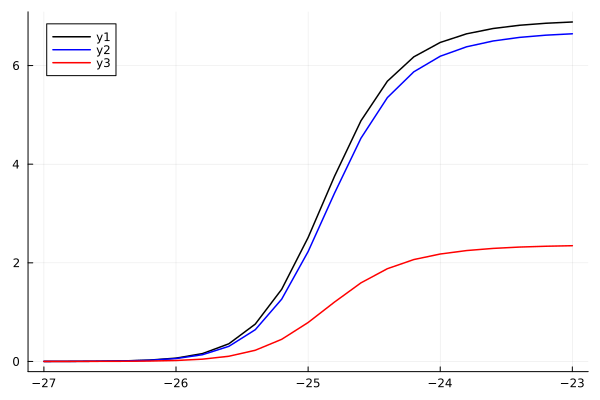

In [89]:
plot(
    log10.(αs),
    [chi2s_IO_2to3_o chi2s_IO_2to3_freefbh chi2s_IO_2to3_badσRSN],
    c=[:black :blue :red],
    lw=1.5
)

In [126]:
χ2_3ν("NO", 1e-24, 1e-26, "B", 0.01, 0.01, false, false, "combined", 20)

(1.8606638341909778, [0.0002814234818964569, -2.2752329807234598e-6, 0.0014509585989102903, 0.0002701196386143234])

In [24]:
αs = 10 .^ range(-27, -23, 21)

χ2s_NOQD_B_r = [χ2_3ν("NOQD", α1, α2, "B", 0.4, 0.2, true, true, "combined", 20)[1] for α1 in αs, α2 in αs]

χ2s_NOQD_B_o = [χ2_3ν("NOQD", α1, α2, "B", 0.01, 0.01, false, false, "combined", 20)[1] for α1 in αs, α2 in αs];

In [55]:
χ2s_NOQD_C_o = [χ2_3ν("NOQD", α3, α2, "C", 0.01, 0.01, false, false, "combined", 20)[1] for α3 in αs, α2 in αs];

In [56]:
plottingdatadir = "/Users/millermacdonald/Desktop/Research_shit/NBI_Research/Data/plotting_data"
writedlm("$plottingdatadir/chi2s_NOQD_B_o", χ2s_NOQD_B_o)
writedlm("$plottingdatadir/chi2s_NOQD_B_r", χ2s_NOQD_B_r)
writedlm("$plottingdatadir/chi2s_NOQD_C_o", χ2s_NOQD_C_o)

In [67]:
χ2s_NOQD_3to1_r = [χ2_2ν(α, "NOQD", 1, 0.4, 0.2, true, true, "combined", 20)[1] for α in αs]
χ2s_NO_2to1_r = [χ2_2ν(α, "NO", "alt", 0.4, 0.2, true, true, "combined", 20)[1] for α in αs]
χ2s_NOQD_1to3_r = [χ2_2ν(α, "IO", "alt", 0.4, 0.2, true, true, "combined", 20)[1] for α in αs]

χ2s_NOQD_3to1_o = [χ2_2ν(α, "NOQD", 1, 0.01, 0.01, false, false, "combined", 20)[1] for α in αs]
χ2s_NO_2to1_o = [χ2_2ν(α, "NO", "alt", 0.01, 0.01, false, false, "combined", 20)[1] for α in αs]
χ2s_NOQD_1to3_o = [χ2_2ν(α, "IO", "alt", 0.01, 0.01, false, false, "combined", 20)[1] for α in αs]

χ2s_NOQD_3to1_o_freefbh = [χ2_2ν(α, "NOQD", 1, 0.01, 0.01, true, false, "combined", 20)[1] for α in αs]
χ2s_NO_2to1_o_badRSN = [χ2_2ν(α, "NO", "alt", 0.4, 0.01, false, false, "combined", 20)[1] for α in αs];

In [72]:
χ2s_NOQD_3to1_o_badRSN = [χ2_2ν(α, "NOQD", 1, 0.4, 0.01, false, false, "combined", 20)[1] for α in αs]
χ2s_NO_2to1_o_freefbh = [χ2_2ν(α, "NO", "alt", 0.01, 0.01, true, false, "combined", 20)[1] for α in αs];

In [19]:
αs = 10 .^ range(-27, -23, 21)
χ2s_NOQD_3to1_o_withNC = [χ2_2ν(α, "NOQD", 1, 0.01, 0.01, false, true, "combined", 20)[1] for α in αs]
χ2s_NO_2to1_o_withNC = [χ2_2ν(α, "NO", "alt", 0.01, 0.01, false, true, "combined", 20)[1] for α in αs];

In [20]:
writedlm("$plottingdatadir/chi2s_NOQD_3to1_o_withNC", χ2s_NOQD_3to1_o_withNC)
writedlm("$plottingdatadir/chi2s_NO_2to1_o_withNC", χ2s_NO_2to1_o_withNC)

In [74]:
writedlm("$plottingdatadir/chi2s_NOQD_3to1_r", χ2s_NOQD_3to1_r)
writedlm("$plottingdatadir/chi2s_NO_2to1_r", χ2s_NO_2to1_r)
writedlm("$plottingdatadir/chi2s_IO_1to3_r", χ2s_NOQD_1to3_r)

writedlm("$plottingdatadir/chi2s_NOQD_3to1_o", χ2s_NOQD_3to1_o)
writedlm("$plottingdatadir/chi2s_NO_2to1_o", χ2s_NO_2to1_o)
writedlm("$plottingdatadir/chi2s_IO_1to3_o", χ2s_NOQD_1to3_o)

writedlm("$plottingdatadir/chi2s_NOQD_3to1_o_freefbh", χ2s_NOQD_3to1_o_freefbh)
writedlm("$plottingdatadir/chi2s_NOQD_3to1_o_badRSN", χ2s_NOQD_3to1_o_badRSN)
writedlm("$plottingdatadir/chi2s_NO_2to1_o_badRSN", χ2s_NO_2to1_o_badRSN)
writedlm("$plottingdatadir/chi2s_NO_2to1_o_freefbh", χ2s_NO_2to1_o_freefbh);

In [38]:
plottingdatadir = "/Users/millermacdonald/Desktop/Research_shit/NBI_Research/Data/plotting_data"
es_dsnb = range(0.5, 40, 1000)

dsnb_nodecay_NO_nuebar_f21 = DSNB_freefbh.(es_dsnb, 0.0, true, "NO", 0.21, SNRnorm)
writedlm("$plottingdatadir/dsnb_nodecay_NO_nuebar_f21", dsnb_nodecay_NO_nuebar_f21)

dsnb_nodecay_NO_nuebar_f09 = DSNB_freefbh.(es_dsnb, 0.0, true, "NO", 0.09, SNRnorm)
writedlm("$plottingdatadir/dsnb_nodecay_NO_nuebar_f09", dsnb_nodecay_NO_nuebar_f09)

dsnb_nodecay_NO_nuebar_f41 = DSNB_freefbh.(es_dsnb, 0.0, true, "NO", 0.41, SNRnorm)
writedlm("$plottingdatadir/dsnb_nodecay_NO_nuebar_f41", dsnb_nodecay_NO_nuebar_f41)

dsnb_nodecay_NO_nue_f21 = DSNB_freefbh.(es_dsnb, 0.0, false, "NO", 0.21, SNRnorm)
writedlm("$plottingdatadir/dsnb_nodecay_NO_nue_f21", dsnb_nodecay_NO_nue_f21)

dsnb_nodecay_NO_nue_f09 = DSNB_freefbh.(es_dsnb, 0.0, false, "NO", 0.09, SNRnorm)
writedlm("$plottingdatadir/dsnb_nodecay_NO_nue_f09", dsnb_nodecay_NO_nue_f09)

dsnb_nodecay_NO_nue_f41 = DSNB_freefbh.(es_dsnb, 0.0, false, "NO", 0.41, SNRnorm)
writedlm("$plottingdatadir/dsnb_nodecay_NO_nue_f41", dsnb_nodecay_NO_nue_f41)

dsnb_nodecay_IO_nuebar_f21 = DSNB_freefbh.(es_dsnb, 0.0, true, "IO", 0.21, SNRnorm)
writedlm("$plottingdatadir/dsnb_nodecay_IO_nuebar_f21", dsnb_nodecay_IO_nuebar_f21)

dsnb_nodecay_IO_nuebar_f09 = DSNB_freefbh.(es_dsnb, 0.0, true, "IO", 0.09, SNRnorm)
writedlm("$plottingdatadir/dsnb_nodecay_IO_nuebar_f09", dsnb_nodecay_IO_nuebar_f09)

dsnb_nodecay_IO_nuebar_f41 = DSNB_freefbh.(es_dsnb, 0.0, true, "IO", 0.41, SNRnorm)
writedlm("$plottingdatadir/dsnb_nodecay_IO_nuebar_f41", dsnb_nodecay_IO_nuebar_f41)

dsnb_nodecay_IO_nue_f21 = DSNB_freefbh.(es_dsnb, 0.0, false, "IO", 0.21, SNRnorm)
writedlm("$plottingdatadir/dsnb_nodecay_IO_nue_f21", dsnb_nodecay_IO_nue_f21)

dsnb_nodecay_IO_nue_f09 = DSNB_freefbh.(es_dsnb, 0.0, false, "IO", 0.09, SNRnorm)
writedlm("$plottingdatadir/dsnb_nodecay_IO_nue_f09", dsnb_nodecay_IO_nue_f09)

dsnb_nodecay_IO_nue_f41 = DSNB_freefbh.(es_dsnb, 0.0, false, "IO", 0.41, SNRnorm)
writedlm("$plottingdatadir/dsnb_nodecay_IO_nue_f41", dsnb_nodecay_IO_nue_f41);

In [39]:
dsnb_NO_3to1_24 = dsnb_2ν_freefbh.(es_dsnb, -24.0, true, "NO", "1", 0.21)
writedlm("$plottingdatadir/dsnb_NO_3to1_24", dsnb_NO_3to1_24)

dsnb_NO_3to2_24 = dsnb_2ν_freefbh.(es_dsnb, -24.0, true, "NO", "2", 0.21)
writedlm("$plottingdatadir/dsnb_NO_3to2_24", dsnb_NO_3to2_24)

dsnb_NO_2to1_24 = dsnb_2ν_freefbh.(es_dsnb, -24.0, true, "NO", "alt", 0.21)
writedlm("$plottingdatadir/dsnb_NO_2to1_24", dsnb_NO_2to1_24)

dsnb_NOQD_3to1_24 = dsnb_2ν_freefbh.(es_dsnb, -24.0, true, "NOQD", "1", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_3to1_24", dsnb_NOQD_3to1_24)

dsnb_NOQD_3to2_24 = dsnb_2ν_freefbh.(es_dsnb, -24.0, true, "NOQD", "2", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_3to2_24", dsnb_NOQD_3to2_24)

dsnb_NOQD_2to1_24 = dsnb_2ν_freefbh.(es_dsnb, -24.0, true, "NOQD", "alt", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_2to1_24", dsnb_NOQD_2to1_24)

dsnb_IO_2to1_24 = dsnb_2ν_freefbh.(es_dsnb, -24.0, true, "IO", "1", 0.21)
writedlm("$plottingdatadir/dsnb_IO_2to1_24", dsnb_IO_2to1_24)

dsnb_IO_2to3_24 = dsnb_2ν_freefbh.(es_dsnb, -24.0, true, "IO", "3", 0.21)
writedlm("$plottingdatadir/dsnb_IO_2to3_24", dsnb_IO_2to3_24)

dsnb_IO_1to3_24 = dsnb_2ν_freefbh.(es_dsnb, -24.0, true, "IO", "alt", 0.21)
writedlm("$plottingdatadir/dsnb_IO_1to3_24", dsnb_IO_1to3_24);

In [40]:
plottingdatadir = "/Users/millermacdonald/Desktop/Research_shit/NBI_Research/Data/plotting_data"
es_dsnb = range(0.5, 40, 1000)

dsnb_IO_3nu_B_24_24 = dsnb_3ν_IO_freefbh.(es_dsnb, -24.0, -24.0, true, "B", 0.21)
writedlm("$plottingdatadir/dsnb_IO_3nu_B_24_24", dsnb_IO_3nu_B_24_24)

dsnb_IO_3nu_B_26_24 = dsnb_3ν_IO_freefbh.(es_dsnb, -26.0, -24.0, true, "B", 0.21)
writedlm("$plottingdatadir/dsnb_IO_3nu_B_26_24", dsnb_IO_3nu_B_26_24)

dsnb_IO_3nu_B_24_26 = dsnb_3ν_IO_freefbh.(es_dsnb, -24.0, -26.0, true, "B", 0.21)
writedlm("$plottingdatadir/dsnb_IO_3nu_B_24_26", dsnb_IO_3nu_B_24_26)

dsnb_IO_3nu_B_256_25 = dsnb_3ν_IO_freefbh.(es_dsnb, -25.6, -25.0, true, "B", 0.21)
writedlm("$plottingdatadir/dsnb_IO_3nu_B_256_25", dsnb_IO_3nu_B_256_25)

dsnb_IO_3nu_C_24_24 = dsnb_3ν_IO_freefbh.(es_dsnb, -24.0, -24.0, true, "C", 0.21)
writedlm("$plottingdatadir/dsnb_IO_3nu_C_24_24", dsnb_IO_3nu_C_24_24)

dsnb_IO_3nu_C_26_24 = dsnb_3ν_IO_freefbh.(es_dsnb, -26.0, -24.0, true, "C", 0.21)
writedlm("$plottingdatadir/dsnb_IO_3nu_C_26_24", dsnb_IO_3nu_C_26_24)

dsnb_IO_3nu_C_24_26 = dsnb_3ν_IO_freefbh.(es_dsnb, -24.0, -26.0, true, "C", 0.21)
writedlm("$plottingdatadir/dsnb_IO_3nu_C_24_26", dsnb_IO_3nu_C_24_26)

dsnb_NOQD_3nu_B_24_24 = dsnb_3ν_NOQD_freefbh.(es_dsnb, -24.0, -24.0, true, "B", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_3nu_B_24_24", dsnb_NOQD_3nu_B_24_24)

dsnb_NOQD_3nu_B_26_24 = dsnb_3ν_NOQD_freefbh.(es_dsnb, -26.0, -24.0, true, "B", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_3nu_B_26_24", dsnb_NOQD_3nu_B_26_24)

dsnb_NOQD_3nu_B_24_26 = dsnb_3ν_NOQD_freefbh.(es_dsnb, -24.0, -26.0, true, "B", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_3nu_B_24_26", dsnb_NOQD_3nu_B_24_26)

dsnb_NOQD_3nu_C_24_24 = dsnb_3ν_NOQD_freefbh.(es_dsnb, -24.0, -24.0, true, "C", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_3nu_C_24_24", dsnb_NOQD_3nu_C_24_24)

dsnb_NOQD_3nu_C_26_24 = dsnb_3ν_NOQD_freefbh.(es_dsnb, -26.0, -24.0, true, "C", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_3nu_C_26_24", dsnb_NOQD_3nu_C_26_24)

dsnb_NOQD_3nu_C_24_26 = dsnb_3ν_NOQD_freefbh.(es_dsnb, -24.0, -26.0, true, "C", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_3nu_C_24_26", dsnb_NOQD_3nu_C_24_26);

In [203]:
dsnb_IO_2toi_24 = DSNB_idecay_freefbh.(es_dsnb, 0.0, 0.0, 1e-24, 0.0, true, "IO", 0.21, SNRnorm)
writedlm("$plottingdatadir/dsnb_IO_2toi_24", dsnb_IO_2toi_24)

dsnb_IO_3nu_I_25_25 = dsnb_3ν_IO_freefbh.(es_dsnb, -25.0, -25.0, true, "I", 0.21)
writedlm("$plottingdatadir/dsnb_IO_3nu_I_25_25", dsnb_IO_3nu_I_25_25)

dsnb_IO_3nu_C_25_25 = dsnb_3ν_IO_freefbh.(es_dsnb, -25.0, -25.0, true, "C", 0.21)
writedlm("$plottingdatadir/dsnb_IO_3nu_C_25_25", dsnb_IO_3nu_C_25_25);

In [195]:
dsnb_IO_2toi_24 = DSNB_idecay_freefbh.(es_dsnb, 0.0, 0.0, 1e-23, 0.0, true, "IO", 0.21, SNRnorm)
dsnb_IO_1toi_24 = DSNB_idecay_freefbh.(es_dsnb, 0.0, 10^(-24.2), 0.0, 0.0, true, "IO", 0.21, SNRnorm);
dsnb_IO_likeQD = dsnb_3ν_IO_freefbh.(es_dsnb, -26.0, -24.0, true, "C", 0.21)
dsnb_IO_likeQD_2 = dsnb_3ν_IO_freefbh.(es_dsnb, -24.2, -26.2, true, "B", 0.21)

1000-element Vector{Float64}:
 0.14153340465426528
 0.14268788985688888
 0.14384237505951247
 0.14499686026213607
 0.14615134546475964
 0.14730583066738323
 0.14846031587000683
 0.14961480107263042
 0.150769286275254
 0.15192377147787758
 ⋮
 0.0007368423281279612
 0.0007323522945644366
 0.0007278622610009122
 0.0007233722274373875
 0.0007188821938738629
 0.0007143921603103384
 0.0007099021267468138
 0.0007054120931832892
 0.0007009220596197646

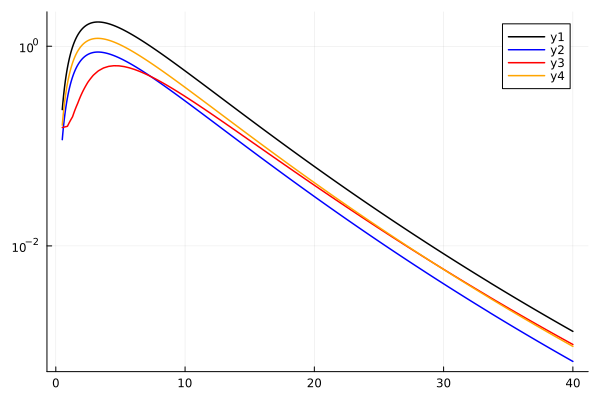

In [196]:
plot(
    es_dsnb,
    [dsnb_nodecay_IO_nuebar_f21 0.5*dsnb_nodecay_IO_nuebar_f21  dsnb_IO_likeQD dsnb_IO_2toi_24],
    yscale=:log10,
    c=[:black :blue :red :orange],
    lw=1.5
)

In [37]:
plottingdatadir = "/Users/millermacdonald/Desktop/Research_shit/NBI_Research/Data/plotting_data"
es_dsnb = range(0.5, 40, 1000)

dsnb_NO_3nu_C_24_24 = dsnb_3ν_NO_freefbh.(es_dsnb, -24.0, -24.0, true, "C", 0.21)
writedlm("$plottingdatadir/dsnb_NO_3nu_C_24_24", dsnb_NO_3nu_C_24_24)

dsnb_NO_3nu_C_26_24 = dsnb_3ν_NO_freefbh.(es_dsnb, -26.0, -24.0, true, "C", 0.21)
writedlm("$plottingdatadir/dsnb_NO_3nu_C_26_24", dsnb_NO_3nu_C_26_24)

dsnb_NO_3nu_C_24_26 = dsnb_3ν_NO_freefbh.(es_dsnb, -24.0, -26.0, true, "C", 0.21)
writedlm("$plottingdatadir/dsnb_NO_3nu_C_24_26", dsnb_NO_3nu_C_24_26)

dsnb_NO_3nu_B_24_24 = dsnb_3ν_NO_freefbh.(es_dsnb, -24.0, -24.0, true, "B", 0.21)
writedlm("$plottingdatadir/dsnb_NO_3nu_B_24_24", dsnb_NO_3nu_B_24_24)

dsnb_NO_3nu_B_26_24 = dsnb_3ν_NO_freefbh.(es_dsnb, -26.0, -24.0, true, "B", 0.21)
writedlm("$plottingdatadir/dsnb_NO_3nu_B_26_24", dsnb_NO_3nu_B_26_24)

dsnb_NO_3nu_B_24_26 = dsnb_3ν_NO_freefbh.(es_dsnb, -24.0, -26.0, true, "B", 0.21)
writedlm("$plottingdatadir/dsnb_NO_3nu_B_24_26", dsnb_NO_3nu_B_24_26);

In [66]:
dsnb_NO_3to1_25 = dsnb_2ν_freefbh.(es_dsnb, -25.0, true, "NO", "1", 0.21)
writedlm("$plottingdatadir/dsnb_NO_3to1_25", dsnb_NO_3to1_25)

dsnb_NO_3to2_25 = dsnb_2ν_freefbh.(es_dsnb, -25.0, true, "NO", "2", 0.21)
writedlm("$plottingdatadir/dsnb_NO_3to2_25", dsnb_NO_3to2_25)

dsnb_NO_2to1_25 = dsnb_2ν_freefbh.(es_dsnb, -25.0, true, "NO", "alt", 0.21)
writedlm("$plottingdatadir/dsnb_NO_2to1_25", dsnb_NO_2to1_25)

dsnb_NOQD_3to1_25 = dsnb_2ν_freefbh.(es_dsnb, -25.0, true, "NOQD", "1", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_3to1_25", dsnb_NOQD_3to1_25)

dsnb_NOQD_3to2_25 = dsnb_2ν_freefbh.(es_dsnb, -25.0, true, "NOQD", "2", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_3to2_25", dsnb_NOQD_3to2_25)

dsnb_NOQD_2to1_25 = dsnb_2ν_freefbh.(es_dsnb, -25.0, true, "NOQD", "alt", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_2to1_25", dsnb_NOQD_2to1_25)

dsnb_IO_2to1_25 = dsnb_2ν_freefbh.(es_dsnb, -25.0, true, "IO", "1", 0.21)
writedlm("$plottingdatadir/dsnb_IO_2to1_25", dsnb_IO_2to1_25)

dsnb_IO_2to3_25 = dsnb_2ν_freefbh.(es_dsnb, -25.0, true, "IO", "3", 0.21)
writedlm("$plottingdatadir/dsnb_IO_2to3_25", dsnb_IO_2to3_25)

dsnb_IO_1to3_25 = dsnb_2ν_freefbh.(es_dsnb, -25.0, true, "IO", "alt", 0.21)
writedlm("$plottingdatadir/dsnb_IO_1to3_25", dsnb_IO_1to3_25)

dsnb_NO_3to1_26 = dsnb_2ν_freefbh.(es_dsnb, -26.0, true, "NO", "1", 0.21)
writedlm("$plottingdatadir/dsnb_NO_3to1_26", dsnb_NO_3to1_26)

dsnb_NO_3to2_26 = dsnb_2ν_freefbh.(es_dsnb, -26.0, true, "NO", "2", 0.21)
writedlm("$plottingdatadir/dsnb_NO_3to2_26", dsnb_NO_3to2_26)

dsnb_NO_2to1_26 = dsnb_2ν_freefbh.(es_dsnb, -26.0, true, "NO", "alt", 0.21)
writedlm("$plottingdatadir/dsnb_NO_2to1_26", dsnb_NO_2to1_26)

dsnb_NOQD_3to1_26 = dsnb_2ν_freefbh.(es_dsnb, -26.0, true, "NOQD", "1", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_3to1_26", dsnb_NOQD_3to1_26)

dsnb_NOQD_3to2_26 = dsnb_2ν_freefbh.(es_dsnb, -26.0, true, "NOQD", "2", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_3to2_26", dsnb_NOQD_3to2_26)

dsnb_NOQD_2to1_26 = dsnb_2ν_freefbh.(es_dsnb, -26.0, true, "NOQD", "alt", 0.21)
writedlm("$plottingdatadir/dsnb_NOQD_2to1_26", dsnb_NOQD_2to1_26)

dsnb_IO_2to1_26 = dsnb_2ν_freefbh.(es_dsnb, -26.0, true, "IO", "1", 0.21)
writedlm("$plottingdatadir/dsnb_IO_2to1_26", dsnb_IO_2to1_26)

dsnb_IO_2to3_26 = dsnb_2ν_freefbh.(es_dsnb, -26.0, true, "IO", "3", 0.21)
writedlm("$plottingdatadir/dsnb_IO_2to3_26", dsnb_IO_2to3_26)

dsnb_IO_1to3_26 = dsnb_2ν_freefbh.(es_dsnb, -26.0, true, "IO", "alt", 0.21)
writedlm("$plottingdatadir/dsnb_IO_1to3_26", dsnb_IO_1to3_26)

In [204]:
backgroundsum_HK_noNC = [background_HK(i, 1, 0, 1, 1, 20) for i in 1:length(emins_exp("HK"))]
writedlm("$plottingdatadir/backgroundsum_HK_noNC", backgroundsum_HK_noNC)

backgroundsum_JUNO_noNC = [background_JUNO(i, 1, 0, 20) for i in 1:length(emins_exp("JUNO"))]
writedlm("$plottingdatadir/backgroundsum_JUNO_noNC", backgroundsum_JUNO_noNC)

In [16]:
dsnb_events_HK_nodecay_NO = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, "NO", 1, 0.21, SNRnorm, 20, "HK")
dsnb_events_HK_nodecay_NO_low = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, "NO", 1, 0.21, SNRnorm_low, 20, "HK")
dsnb_events_HK_nodecay_NO_high = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, "NO", 1, 0.21, SNRnorm_high, 20, "HK")
dsnb_events_HK_3to1_NOQD = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 1e-24, "NOQD", 1, 0.21, SNRnorm, 20, "HK")
dsnb_events_HK_3to1_NO = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 1e-24, "NO", 1, 0.21, SNRnorm, 20, "HK")
dsnb_events_HK_2to1_NO = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 1e-24, "NO", "alt", 0.21, SNRnorm, 20, "HK")
backgroundsum_HK = [background_HK(i, 1, 1, 1, 1, 20) for i in 1:length(emins_exp("HK"))]

dsnb_events_JUNO_nodecay_NO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, "NO", 1, 0.21, SNRnorm, 20, "JUNO")
dsnb_events_JUNO_nodecay_NO_low = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, "NO", 1, 0.21, SNRnorm_low, 20, "JUNO")
dsnb_events_JUNO_nodecay_NO_high = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, "NO", 1, 0.21, SNRnorm_high, 20, "JUNO")
dsnb_events_JUNO_3to1_NOQD = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 1e-24, "NOQD", 1, 0.21, SNRnorm, 20, "JUNO")
dsnb_events_JUNO_3to1_NO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 1e-24, "NO", 1, 0.21, SNRnorm, 20, "JUNO")
dsnb_events_JUNO_2to1_NO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 1e-24, "NO", "alt", 0.21, SNRnorm, 20, "JUNO")
backgroundsum_JUNO = [background_JUNO(i, 1, 1, 20) for i in 1:length(emins_exp("JUNO"))]

dsnb_events_DUNE_nodecay_NO = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, "NO", 1, 0.21, SNRnorm, 20, "DUNE")
dsnb_events_DUNE_nodecay_NO_low = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, "NO", 1, 0.21, SNRnorm_low, 20, "DUNE")
dsnb_events_DUNE_nodecay_NO_high = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, "NO", 1, 0.21, SNRnorm_high, 20, "DUNE")
dsnb_events_DUNE_3to1_NOQD = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 1e-24, "NOQD", 1, 0.21, SNRnorm, 20, "DUNE")
dsnb_events_DUNE_3to1_NO = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 1e-24, "NO", 1, 0.21, SNRnorm, 20, "DUNE")
dsnb_events_DUNE_2to1_NO = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 1e-24, "NO", "alt", 0.21, SNRnorm, 20, "DUNE")
backgroundsum_DUNE = [background_DUNE(i, 1, 20) for i in 1:length(emins_exp("DUNE"))];

dsnb_events_HK_nodecay_IO = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, "IO", 1, 0.21, SNRnorm, 20, "HK")
dsnb_events_HK_nodecay_IO_low = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, "IO", 1, 0.21, SNRnorm_low, 20, "HK")
dsnb_events_HK_nodecay_IO_high = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 0.0, "IO", 1, 0.21, SNRnorm_high, 20, "HK")
dsnb_events_HK_1to3_IO = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 1e-24, "IO", "alt", 0.21, SNRnorm, 20, "HK")

dsnb_events_JUNO_nodecay_IO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, "IO", 1, 0.21, SNRnorm, 20, "JUNO")
dsnb_events_JUNO_nodecay_IO_low = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, "IO", 1, 0.21, SNRnorm_low, 20, "JUNO")
dsnb_events_JUNO_nodecay_IO_high = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 0.0, "IO", 1, 0.21, SNRnorm_high, 20, "JUNO")
dsnb_events_JUNO_1to3_IO = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 1e-24, "IO", "alt", 0.21, SNRnorm, 20, "JUNO")

dsnb_events_DUNE_nodecay_IO = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, "IO", 1, 0.21, SNRnorm, 20, "DUNE")
dsnb_events_DUNE_nodecay_IO_low = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, "IO", 1, 0.21, SNRnorm_low, 20, "DUNE")
dsnb_events_DUNE_nodecay_IO_high = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 0.0, "IO", 1, 0.21, SNRnorm_high, 20, "DUNE")
dsnb_events_DUNE_1to3_IO = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 1e-24, "IO", "alt", 0.21, SNRnorm, 20, "DUNE");

In [36]:
dsnb_events_HK_3to1_NOQD_part = event_rate_2ν.(emins_exp("HK"), emins_exp("HK") .+ 2, 10^(-25.4), "NOQD", 1, 0.21, SNRnorm, 20, "HK")
dsnb_events_JUNO_3to1_NOQD_part = event_rate_2ν.(emins_exp("JUNO"), emins_exp("JUNO") .+ 2, 10^(-25.4), "NOQD", 1, 0.21, SNRnorm, 20, "JUNO")
dsnb_events_DUNE_3to1_NOQD_part = event_rate_2ν.(emins_exp("DUNE"), emins_exp("DUNE") .+ 2, 10^(-25.4), "NOQD", 1, 0.21, SNRnorm, 20, "DUNE")

6-element Vector{Float64}:
 1.9214789130226482
 1.6865756161844927
 1.4651091612735725
 1.2616967903357124
 1.075124526387656
 0.9051699449342908

In [17]:
writedlm("$plottingdatadir/dsnb_events_HK_2to1_NO", dsnb_events_HK_2to1_NO)
writedlm("$plottingdatadir/dsnb_events_JUNO_2to1_NO", dsnb_events_JUNO_2to1_NO)
writedlm("$plottingdatadir/dsnb_events_DUNE_2to1_NO", dsnb_events_DUNE_2to1_NO)

In [17]:
plottingdatadir = "/Users/millermacdonald/Desktop/Research_shit/NBI_Research/Data/plotting_data"

writedlm("$plottingdatadir/dsnb_events_HK_nodecay_NO", dsnb_events_HK_nodecay_NO)
writedlm("$plottingdatadir/dsnb_events_HK_nodecay_NO_low", dsnb_events_HK_nodecay_NO_low)
writedlm("$plottingdatadir/dsnb_events_HK_nodecay_NO_high", dsnb_events_HK_nodecay_NO_high)
writedlm("$plottingdatadir/dsnb_events_HK_3to1_NOQD", dsnb_events_HK_3to1_NOQD)
writedlm("$plottingdatadir/dsnb_events_HK_3to1_NO", dsnb_events_HK_3to1_NO)
writedlm("$plottingdatadir/backgroundsum_HK", backgroundsum_HK)

writedlm("$plottingdatadir/dsnb_events_JUNO_nodecay_NO", dsnb_events_JUNO_nodecay_NO)
writedlm("$plottingdatadir/dsnb_events_JUNO_nodecay_NO_low", dsnb_events_JUNO_nodecay_NO_low)
writedlm("$plottingdatadir/dsnb_events_JUNO_nodecay_NO_high", dsnb_events_JUNO_nodecay_NO_high)
writedlm("$plottingdatadir/dsnb_events_JUNO_3to1_NOQD", dsnb_events_JUNO_3to1_NOQD)
writedlm("$plottingdatadir/dsnb_events_JUNO_3to1_NO", dsnb_events_JUNO_3to1_NO)
writedlm("$plottingdatadir/backgroundsum_JUNO", backgroundsum_JUNO)

writedlm("$plottingdatadir/dsnb_events_DUNE_nodecay_NO", dsnb_events_DUNE_nodecay_NO)
writedlm("$plottingdatadir/dsnb_events_DUNE_nodecay_NO_low", dsnb_events_DUNE_nodecay_NO_low)
writedlm("$plottingdatadir/dsnb_events_DUNE_nodecay_NO_high", dsnb_events_DUNE_nodecay_NO_high)
writedlm("$plottingdatadir/dsnb_events_DUNE_3to1_NOQD", dsnb_events_DUNE_3to1_NOQD)
writedlm("$plottingdatadir/dsnb_events_DUNE_3to1_NO", dsnb_events_DUNE_3to1_NO)
writedlm("$plottingdatadir/backgroundsum_DUNE", backgroundsum_DUNE)

writedlm("$plottingdatadir/dsnb_events_HK_nodecay_IO", dsnb_events_HK_nodecay_IO)
writedlm("$plottingdatadir/dsnb_events_HK_nodecay_IO_low", dsnb_events_HK_nodecay_IO_low)
writedlm("$plottingdatadir/dsnb_events_HK_nodecay_IO_high", dsnb_events_HK_nodecay_IO_high)
writedlm("$plottingdatadir/dsnb_events_HK_1to3_IO", dsnb_events_HK_1to3_IO)

writedlm("$plottingdatadir/dsnb_events_JUNO_nodecay_IO", dsnb_events_JUNO_nodecay_IO)
writedlm("$plottingdatadir/dsnb_events_JUNO_nodecay_IO_low", dsnb_events_JUNO_nodecay_IO_low)
writedlm("$plottingdatadir/dsnb_events_JUNO_nodecay_IO_high", dsnb_events_JUNO_nodecay_IO_high)
writedlm("$plottingdatadir/dsnb_events_JUNO_1to3_IO", dsnb_events_JUNO_1to3_IO)

writedlm("$plottingdatadir/dsnb_events_DUNE_nodecay_IO", dsnb_events_DUNE_nodecay_IO)
writedlm("$plottingdatadir/dsnb_events_DUNE_nodecay_IO_low", dsnb_events_DUNE_nodecay_IO_low)
writedlm("$plottingdatadir/dsnb_events_DUNE_nodecay_IO_high", dsnb_events_DUNE_nodecay_IO_high)
writedlm("$plottingdatadir/dsnb_events_DUNE_1to3_IO", dsnb_events_DUNE_1to3_IO);